<a href="https://colab.research.google.com/github/DSabarish/netflix_data_analysis/blob/main/Netflix_Sabarish_Scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Sabarish S
<br>selvamsabarish1998@gmail.com
<br>Scaler - DSML NOV 23
<br>Netflix Case Study

---


# **1. Introduction**



#### **1.1. Overview of the Dataset**





**Overview of the Dataset**

The Netflix dataset contains a comprehensive list of all the TV shows and movies available on Netflix. It includes various attributes that provide detailed information about each title. This dataset is essential for analyzing the content available on Netflix and deriving insights to help inform business decisions regarding content production and acquisition.


**Attributes:**

- **Show_id:** Unique ID for every Movie / TV Show.
  - *Example:* `s1`, `s2`, ...
- **Type:** Identifier indicating whether the title is a Movie or TV Show.
  - *Example:* `Movie`, `TV Show`
- **Title:** The title of the Movie / TV Show.
  - *Example:* `Stranger Things`, `The Irishman`
- **Director:** The director of the Movie.
  - *Example:* `Steven Spielberg`, `Christopher Nolan`
- **Cast:** The main actors involved in the movie/show.
  - *Example:* `Winona Ryder, David Harbour`, `Robert De Niro, Al Pacino`
- **Country:** The country where the movie/show was produced.
  - *Example:* `United States`, `United Kingdom`
- **Date_added:** The date when the movie/show was added to Netflix.
  - *Example:* `September 9, 2019`, `January 1, 2020`
- **Release_year:** The actual release year of the movie/show.
  - *Example:* `2016`, `2019`
- **Rating:** The TV rating of the movie/show, indicating its suitability for different audiences.
  - *Example:* `PG-13`, `TV-MA`
- **Duration:** The total duration of the content – in minutes for movies or the number of seasons for TV shows.
  - *Example:* `90 min`, `2 Seasons`
- **Listed_in:** The genre of the movie/show.
  - *Example:* `Drama, Thriller`, `Comedy, Action`
- **Description:** A brief summary or description of the movie/show.
  - *Example:* `A young girl with mysterious powers arrives in a small town, turning everyone's lives upside down.`, `A thrilling heist story with twists and turns.`

---


### **1.2. Objectives of the Analysis**



The main goals and objectives of the analysis are to:

- Analyze the data to generate insights that could help Netflix in deciding which type of shows/movies to produce.
- Explore strategies for growing the business in different countries.


### **1.3. Questions to Explore**


1. **What type of content is available in different countries?**
   - Analyze the distribution of content genres across different countries.
   - Identify popular genres in each country.

2. **How has the number of movies released per year changed over the last 20-30 years?**
   - Investigate the trend of movie releases over the years.
   - Determine if there has been any significant change in the number of movie releases.

3. **Comparison of TV shows vs. movies.**
   - Compare the distribution of TV shows and movies in the dataset.
   - Analyze any trends or patterns in the production of TV shows and movies.

4. **What is the best time to launch a TV show?**
   - Analyze the distribution of TV show releases over time.
   - Identify any seasonal trends or patterns in TV show launches.

5. **Analysis of actors/directors of different types of shows/movies.**
   - Investigate the involvement of actors and directors in various types of shows and movies.
   - Identify popular actors and directors in different genres.

6. **Does Netflix focus more on TV Shows than movies in recent years?**
   - Compare the production of TV shows and movies over recent years.
   - Analyze any shifts in focus between TV shows and movies.

7. **Understanding what content is available in different countries.**
   - Explore the variety of content available in different countries.
   - Identify any localization trends in content offerings.

By addressing these questions, we aim to provide data-driven recommendations that can assist Netflix in optimizing its content production and distribution strategies to enhance user engagement and drive business growth.

# **2. Netflix Case Study**

### **2.1. Problem Statement**


- In this Netflix case, the problem could be:
  - Identifying content preferences and consumption patterns to inform Netflix's content production and distribution strategy.
  - Understanding factors influencing user engagement and retention on the platform.
  - Optimizing content offerings to cater to diverse audience demographics and preferences.
  


### **2.2. Basic Metrics**




#### 2.2.1. Loading the Dataset

**Data Loading:**
- Load the provided dataset into your analysis environment.
- Use appropriate libraries and functions to load the dataset.


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
import nltk
nltk.download('punkt')

# Setting pandas options to display all columns and rows when printing dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# URL of the dataset to be read into a pandas dataframe
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



#### 2.2.2. Displaying Initial Rows




In [ ]:
# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



#### 2.2.3. Dataset Dimensions

**Dataset Dimensions:**
- Provide information about the size of the dataset, including the number of rows and columns.
- This gives an overview of the dataset's scale and complexity.



In [ ]:
# The dimensions of the dataset
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 8807
Number of columns: 12


# **3. Observations on Data Shape, Types, Unnesting, and Missing Values**



### **3.1. Data Types**

`data_quality_statistics` is a user-defined function, that gives stats about the df passed as input.

**Function Definition:**



In [ ]:
def data_quality_statistics(df):
    """
    This function takes a DataFrame as input and returns a DataFrame containing data quality statistics
    for each column in the DataFrame.

    Args:
      df: A Pandas DataFrame.

    Returns:
      A DataFrame containing data quality statistics for each column.
    """
    num_rows = len(df)
    stats = []

    # Calculating statistics of Each column
    for col in df.columns:
        num_unique = df[col].nunique()
        num_nan = df[col].isnull().sum()
        pct_nan = (num_nan / num_rows) * 100
        data_type = df[col].dtype

        # Append statistics to the list
        stats.append({
            'Column': col,
            'Number_of_Rows': num_rows,
            'Number_of Unique Values': num_unique,
            'Number_of_NaN': num_nan,
            'Percentage_of_NaN': round(pct_nan, 2),
            'Data_Type': data_type,
        })
    stats_df = pd.DataFrame(stats)
    return stats_df

In [ ]:
data_quality_statistics(df)

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
0,show_id,8807,8807,0,0.00,object
1,type,8807,2,0,0.00,object
2,title,8807,8807,0,0.00,object
3,director,8807,4528,2634,29.91,object
4,cast,8807,7692,825,9.37,object
5,country,8807,748,831,9.44,object
6,date_added,8807,1767,10,0.11,object
7,release_year,8807,74,0,0.00,int64
8,rating,8807,17,4,0.05,object
9,duration,8807,220,3,0.03,object



**Data Type Analysis:**


In [ ]:
# Call the function to get data quality statistics
data_quality_stats = data_quality_statistics(df)

# Display data quality statistics for data types
print(data_quality_stats[['Column', 'Data_Type']])

          Column Data_Type
0        show_id    object
1           type    object
2          title    object
3       director    object
4           cast    object
5        country    object
6     date_added    object
7   release_year     int64
8         rating    object
9       duration    object
10     listed_in    object
11   description    object


##### **1. show_id:**
   - The 'show_id' attribute serves as a unique identifier for each movie or TV show in the dataset.
   - It is stored as an object data type, indicating that it contains alphanumeric characters.
   - As a unique identifier, the 'show_id' plays a crucial role in data management and referencing.
   - No data type conversion is necessary for this attribute, as it fulfills its purpose effectively in its current format.

The 'show_id' attribute facilitates the identification and referencing of specific entries within the dataset

In [ ]:
df["show_id"][:5]

0    s1
1    s2
2    s3
3    s4
4    s5
Name: show_id, dtype: object

##### **2. type:**
   - Indicates whether an entry represents a movie or a TV show.
   - Currently stored as an object data type.
   - Given only two distinct values (Movie or TV Show), it can be treated as a categorical variable.
   - Converting it to a categorical data type enhances memory efficiency and facilitates categorical data operations.

The 'type' attribute is crucial for distinguishing between movies and TV shows, impacting various content-related analyses and business decisions. Converting it to a categorical data type improves memory usage and data processing efficiency.

In [ ]:
# Convert 'type' attribute to categorical data type
df['type'] = df['type'].astype('category')
df['type'][:5]

0      Movie
1    TV Show
2    TV Show
3    TV Show
4    TV Show
Name: type, dtype: category
Categories (2, object): ['Movie', 'TV Show']

##### **3. title:**
   - The 'title' attribute represents the title of the movie or TV show.
   - It is currently stored as an object data type.
   - The object data type is suitable for storing textual information such as titles.
   - No data type conversion is necessary for this attribute.


In [ ]:
df["title"][:5]

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

##### **4. director:**

- The 'director' attribute contains names of directors for each movie or TV show, separated by commas. To analyze this information effectively, we need to unnest this column.



In [ ]:
# Create a copy of the DataFrame to work on
df_dir = df[['show_id', 'title', 'director']].copy()

# Specific check for the title "Scooby-Doo on Zombie Island"
Blood_Water_df_before_dir = df_dir[df_dir['title'] == "Scooby-Doo on Zombie Island"]
print("Director column before applying the <process_director> function, Specific check for the title 'Scooby-Doo on Zombie Island'\n")
display(Blood_Water_df_before_dir)

# Function to replace 'nan' with pd.NA and split director names
def process_director(director):
    if isinstance(director, str) and director == 'nan':
        return [pd.NA]
    elif isinstance(director, str):
        return director.split(', ')
    else:
        return director  # If it's already a list or any other type

# Apply the process_director function to the 'director' column
df_dir['director'] = df_dir['director'].apply(process_director)

# Explode the DataFrame to unnest the 'director' column
exploded_dir_df = df_dir.explode('director').reset_index(drop=True)

# Specific check for the title "Scooby-Doo on Zombie Island"
Blood_Water_df_after_dir = exploded_dir_df[exploded_dir_df['title'] == "Scooby-Doo on Zombie Island"][:3]  # Limiting to 3 rows
print("\nDirector column after applying the <process_director> function, Specific check for the title 'Scooby-Doo on Zombie Island'\n")
display(Blood_Water_df_after_dir)


Director column before applying the <process_director> function, Specific check for the title 'Scooby-Doo on Zombie Island'



,show_id,title,director
7959,s7960,Scooby-Doo on Zombie Island,"Hiroshi Aoyama, Kazumi Fukushima, Jim Stenstrum"



Director column after applying the <process_director> function, Specific check for the title 'Scooby-Doo on Zombie Island'



,show_id,title,director
8657,s7960,Scooby-Doo on Zombie Island,Hiroshi Aoyama
8658,s7960,Scooby-Doo on Zombie Island,Kazumi Fukushima
8659,s7960,Scooby-Doo on Zombie Island,Jim Stenstrum


**Explanation:**
- We select the relevant columns ('show_id', 'title', 'director') and create a new DataFrame copy.
- A function named `process_director` is defined to handle director names. It replaces 'nan' with `pd.NA` for missing values and splits director names by commas.
- The function is applied to the 'director' column using the `apply` method, and then the DataFrame is expanded using `explode`, ensuring each director has a separate row.

This process efficiently organizes director information, making it easier to analyze for each movie or TV show.

##### **5. cast:**

- The 'cast' attribute contains names of cast for each movie or TV show, separated by commas. To analyze this information effectively, we need to unnest this column.



In [ ]:
# Create a copy of the DataFrame to work on
df_cast = df[['show_id', 'title', 'cast']].copy()

# Specific check for the title "Blood & Water"
Blood_Water_df_before = df_cast[df_cast['title'] == "Blood & Water"]
print("Cast column before applying the <process_cast> function, Specific check for the title 'Blood & Water'\n")
display(Blood_Water_df_before)

# Function to replace 'nan' with pd.NA and split cast names
def process_cast(cast):
    if isinstance(cast, str) and cast == 'nan':
        return [pd.NA]
    elif isinstance(cast, str):
        return cast.split(', ')
    else:
        return cast  # If it's already a list or any other type

# Apply the process_cast function to the 'cast' column
df_cast['cast'] = df_cast['cast'].apply(process_cast)

# Explode the DataFrame to unnest the 'cast' column
exploded_cast_df = df_cast.explode('cast').reset_index(drop=True)

# Specific check for the title "Blood & Water"
Blood_Water_df_after = exploded_cast_df[exploded_cast_df['title'] == "Blood & Water"][:3]  # Limiting to 3 rows
print("\nCast column after applying the <process_cast> function, Specific check for the title 'Blood & Water'\n")
display(Blood_Water_df_after)


Cast column before applying the <process_cast> function, Specific check for the title 'Blood & Water'



,show_id,title,cast
1,s2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."



Cast column after applying the <process_cast> function, Specific check for the title 'Blood & Water'



,show_id,title,cast
1,s2,Blood & Water,Ama Qamata
2,s2,Blood & Water,Khosi Ngema
3,s2,Blood & Water,Gail Mabalane


**Explanation:**

- **DataFrame Setup:** Essential columns ('show_id', 'title', 'cast') are extracted into a new DataFrame.

- **Processing Function:** The 'process_cast' function handles 'cast' column complexities by replacing missing values and splitting names by commas.

- **Function Application:** The 'process_cast' function is uniformly applied to the 'cast' column, ensuring consistent treatment of each entry.

##### **6. Country:**

- **DataFrame Initialization:** We create a new DataFrame, 'df_country', containing essential columns ('show_id', 'title', 'country').

- **Processing Function:** A function, 'process_country', is designed to address complexities in the 'country' column. It replaces missing values and splits entries by commas.

- **Function Application:** The 'process_country' function is applied to the 'country' column using the 'apply' method, ensuring consistent handling of each entry.


In [ ]:
# Create a copy of the DataFrame to work on
df_country = df[['show_id', 'title', 'country']].copy()

# Specific check for the title "Yellowbird"
Yellowbird_df_before = df_country[df_country['title'] == "Yellowbird"]
print("Country column before applying the <process_country> function, Specific check for the title 'Yellowbird'\n")
display(Yellowbird_df_before)

# Function to replace 'nan' with pd.NA and split country entries
def process_country(country):
    if isinstance(country, str) and country == 'nan':
        return [pd.NA]
    elif isinstance(country, str):
        return country.split(', ')
    else:
        return country  # If it's already a list or any other type

# Apply the process_country function to the 'country' column
df_country['country'] = df_country['country'].apply(process_country)

# Explode the DataFrame to unnest the 'country' column
exploded_country_df = df_country.explode('country').reset_index(drop=True)

# Specific check for the title "Yellowbird"
Yellowbird_df_after = exploded_country_df[exploded_country_df['title'] == "Yellowbird"][:3]  # Limiting to 3 rows
print("\nCountry column after applying the <process_country> function, Specific check for the title 'Yellowbird'\n")
display(Yellowbird_df_after)


Country column before applying the <process_country> function, Specific check for the title 'Yellowbird'



,show_id,title,country
8776,s8777,Yellowbird,"France, Belgium"



Country column after applying the <process_country> function, Specific check for the title 'Yellowbird'



,show_id,title,country
10802,s8777,Yellowbird,France
10803,s8777,Yellowbird,Belgium


##### **7. date_added:**

- **Filling in Missing Dates**: It fills in any missing dates when a show or movie was added to Netflix. It looks at the most common date for each year a show was released and uses that for any missing dates.

- **Checking for Completion**: After filling in missing dates, it checks if there are still any dates left unfilled. If there are, it shows how many are still missing.

- **Making Dates Consistent**: Lastly, it makes sure all dates are in the same format so they can be easily understood and analyzed.

In [ ]:
# Convert 'date_added' column to stirng format
df['date_added'] = df['date_added'].astype(str)

# Impute missing values in 'date_added' based on mode of 'date_added' for each 'release_year'
for i in df[df['date_added'].isnull()]['release_year'].unique():
    imp = df[df['release_year'] == i]['date_added'].mode().values[0]
    df.loc[(df['release_year'] == i) & (df['date_added'].isnull()), 'date_added'] = imp

# Display shape of DataFrame where 'date_added' is still null
display(df[df['date_added'].isnull()].shape)

# Remove leading and trailing whitespace from 'date_added' column
df['date_added'] = df['date_added'].str.strip()

# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['date_added'][:5]

(0, 12)

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

##### **8. release_year:**

- The 'release_year' column contains numerical values representing the year in which each item was released.

- This column provides a straightforward way to understand the chronological order of the releases without the need for any conversion.

In [ ]:
# No datatype conversion needed.
df['release_year'][:5]

0    2020
1    2021
2    2021
3    2021
4    2021
Name: release_year, dtype: int64

##### **9. rating:**

- **Rating Representation:** The 'rating' column contains textual representations of TV or movie ratings, such as "PG-13" or "TV-MA".
- **Audience Suitability:** These ratings signify the appropriateness of content for various audiences, aiding viewers in making informed choices.
- **No Conversion Needed:** Since ratings are presented as strings, no datatype conversion is necessary; they're easily understandable in their current format.

In [ ]:
# No datatype conversion needed.
df['rating'][:5]

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
Name: rating, dtype: object

##### **10. duration:**
- The 'duration' column has suffix as `min` for movies and `season(s)` for TV series.
- Extract numerical part.
- Separate columns: `movie_duration_mins`, `num_of_seasons`.

In [ ]:
def num_of_seasons(x):
    if isinstance(x, str):
        match = re.search(r'(\d+) (Season|Seasons)', x)
        if match:
            return int(match.group(1))
    return 0

df['num_of_seasons'] = df['duration'].apply(num_of_seasons)
df[['type','num_of_seasons']][:5]

,type,num_of_seasons
0,Movie,0
1,TV Show,2
2,TV Show,1
3,TV Show,1
4,TV Show,2


In [ ]:
def extract_movie_duration(duration):
    if isinstance(duration, str) and duration.endswith(' min'):
        match = re.search(r'(\d+) min', duration)
        if match:
            return int(match.group(1))
    return 0

# Apply the function to extract movie duration
df['movie_duration'] = df['duration'].apply(extract_movie_duration)
df[['type','movie_duration']][5:10]

,type,movie_duration
5,TV Show,0
6,Movie,91
7,Movie,125
8,TV Show,0
9,Movie,104


##### **11. listed_in:**

- **DataFrame Initialization:** A DataFrame copy containing essential columns like 'show_id', 'title', and 'listed_in'.

- **Processing Function:** A processing function, `process_listed_in`, is defined to standardize the 'listed_in' entries. It replaces 'nan' with `pd.NA` and splits the genres by commas into a list.

- **Function Application:** After applying the processing function, the DataFrame is exploded to unnest the 'listed_in' column, facilitating easier analysis of genre associations with each title.

In [ ]:
# Create a copy of the DataFrame to work on
df_listed_in = df[['show_id', 'title', 'listed_in']].copy()

# Specific check for the title "Blood & Water"
Blood_Water_df_before_listed_in = df_listed_in[df_listed_in['title'] == "Blood & Water"]
print("Listed_in column before applying the <process_listed_in> function, Specific check for the title 'Blood & Water'\n")
display(Blood_Water_df_before_listed_in)

# Function to replace 'nan' with pd.NA and split listed_in entries
def process_listed_in(listed_in):
    if isinstance(listed_in, str) and listed_in == 'nan':
        return [pd.NA]
    elif isinstance(listed_in, str):
        return listed_in.split(', ')
    else:
        return listed_in  # If it's already a list or any other type

# Apply the process_listed_in function to the 'listed_in' column
df_listed_in['listed_in'] = df_listed_in['listed_in'].apply(process_listed_in)

# Explode the DataFrame to unnest the 'listed_in' column
exploded_listed_in_df = df_listed_in.explode('listed_in').reset_index(drop=True)

# Specific check for the title "Blood & Water"
Blood_Water_df_after_listed_in = exploded_listed_in_df[exploded_listed_in_df['title'] == "Blood & Water"]
print("\nListed_in column after applying the <process_listed_in> function, Specific check for the title 'Blood & Water'\n")
display(Blood_Water_df_after_listed_in)

Listed_in column before applying the <process_listed_in> function, Specific check for the title 'Blood & Water'



,show_id,title,listed_in
1,s2,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"



Listed_in column after applying the <process_listed_in> function, Specific check for the title 'Blood & Water'



,show_id,title,listed_in
1,s2,Blood & Water,International TV Shows
2,s2,Blood & Water,TV Dramas
3,s2,Blood & Water,TV Mysteries


##### **12. description:**
 - Contains brief summaries of TV shows or movies.
 - Provides insights into the plot, genre, and themes.
 - No conversion required, as text data remains in its original format.



In [ ]:
df["description"][:5]

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

### **3.2. Conversion of Categorical Attributes to 'Category'**


In [ ]:
# Assuming 'df' is your DataFrame

# List of columns to convert to categorical
categorical_columns = ['type', 'country', 'rating', 'listed_in']

# Convert selected columns to 'category' data type
df[categorical_columns] = df[categorical_columns].astype('category')

# Check the data types after conversion
print(df.dtypes)


show_id                   object
type                    category
title                     object
director                  object
cast                      object
country                 category
date_added        datetime64[ns]
release_year               int64
rating                  category
duration                  object
listed_in               category
description               object
num_of_seasons             int64
movie_duration             int64
dtype: object


-- The types chosen for each column match well with the kind of data they hold, making the dataset structured and manageable.


### **3.3. Duplicates & Missing Value Detection**




#####**1. Duplicate Record Analysis:**

In [ ]:
# Detect duplicate records
duplicate_rows = df.duplicated()

# Count the number of duplicate records
num_duplicates = duplicate_rows.sum()

# Display duplicate records
duplicate_records = df[duplicate_rows]
print("Duplicate Records:")
print(duplicate_records)

# Display the total number of duplicate records
print("Total number of duplicate records:", num_duplicates)


Duplicate Records:
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, num_of_seasons, movie_duration]
Index: []
Total number of duplicate records: 0


In [ ]:
df.isna().sum()

show_id              0
type                 0
title                0
director          2634
cast               825
country            831
date_added          10
release_year         0
rating               4
duration             3
listed_in            0
description          0
num_of_seasons       0
movie_duration       0
dtype: int64

In [ ]:
df[df["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_of_seasons,movie_duration
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",0,0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,0,0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,0,0


In [ ]:
# cleaning
display(df["rating"][df["duration"].isna()])   #['74 min', '84 min', '66 min']   #[5541, 5794, 5813]
ser = df["rating"][df["duration"].isna()]

5541    74 min
5794    84 min
5813    66 min
Name: rating, dtype: category
Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

In [ ]:
# Before correction
display(df.iloc[ser.index])

rows_to_swap = df.index.isin(ser.index)

# Swap 'rating' and 'duration' values using tuple unpacking
df.loc[rows_to_swap, ['rating', 'duration']] = df.loc[rows_to_swap, ['duration', 'rating']].values

# After Correction
display(df.iloc[ser.index])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_of_seasons,movie_duration
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",0,0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,0,0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,0,0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_of_seasons,movie_duration
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",0,0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,0,0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,0,0


**Inference**

- The dataset contains no duplicate records, indicating a clean and unique dataset ready for analysis.


In [ ]:
df.rating.unique()

['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., 'NC-17', NaN, 'NR', 'TV-Y7-FV', 'UR']
Length: 15
Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

**Missing Value Analysis:**


In [ ]:
data_quality_statistics(df).query(" Percentage_of_NaN > 0 ")

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
3,director,8807,4528,2634,29.91,object
4,cast,8807,7692,825,9.37,object
5,country,8807,748,831,9.44,category
6,date_added,8807,1714,10,0.11,datetime64[ns]
8,rating,8807,14,7,0.08,category


**Inference:**

The dataset has missing values in several columns:
- **Director:** Nearly 30% of entries lack director information.
- **Cast:** Around 9.37% of entries are missing cast details.
- **Country:** Approximately 9.44% of entries lack country information.
- **Date Added:** Only 0.11% of entries have missing date added details.
- **Rating:** A mere 0.05% of entries lack rating information.
- **Duration:** Merely 0.03% of entries are missing duration details.



**Potential Impact of missing values:**

Most columns have a relatively low percentage of missing values, except for the "Director" column, which has a higher rate. This could potentially impact analyses relying heavily on directorial information.

**Strategies for handling missing values**

**Mode-Based Imputation for Missing Values**

The `mode_based_imputation` aids in resolving null value issues by leveraging the distribution of existing data. By imputing missing values with the mode of corresponding groups, it provides a simple yet effective approach to handle missing data, especially when there's a discernible pattern or correlation among features. However, its effectiveness depends on the assumption that the mode within each group accurately represents the missing values, which may not always be the case, especially in datasets with high variability.

Overall, while mode-based imputation can offer a quick solution to missing value problems, it's essential to assess its suitability for the specific dataset and context to ensure the integrity and accuracy of the imputed values.

Let's merger all our computed unnnested dataframes to, serve as the input for imputation.

---


##### **2. Merging the Unnested DataFrame**

In [ ]:
# Chained merge operation
merged_df = (
    exploded_dir_df
    .merge(exploded_cast_df, on=['show_id', 'title'], how='inner')
    .merge(exploded_listed_in_df, on=['show_id', 'title'], how='inner')
    .merge(exploded_country_df, on=['show_id', 'title'], how='inner')
    .merge(df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration','num_of_seasons', 'movie_duration', 'description']], on=['show_id', 'title'], how='inner')
)

# Check for missing values after merging
data_quality_statistics(merged_df)#.query("Percentage_of_NaN > 0")
# Export Backup
merged_df.to_pickle('merged_df.pkl')


In [ ]:
# Import Backup
merged_df = pd.read_pickle('merged_df.pkl')

##### **3. Mode_based_imputation**


The `mode_based_imputation`, is designed to handle missing values in a DataFrame by imputing them based on the mode (most frequent value) of the target feature within groups defined by specified helper features. The function follows these steps:

1. **Dropping Null Rows**: Initially, it removes rows where the target feature (e.g., 'director') is null to ensure accurate mode calculations.

2. **Grouping and Sorting**: It then groups the DataFrame by the specified helper features (e.g., 'listed_in', 'country', 'type') and sorts the target feature values within each group based on their frequency (mode).

3. **Imputation**: For each group, it determines the most frequent value (mode) of the target feature and fills missing values in that group with this mode value.

In [ ]:
def mode_based_imputation(df, target_feature, mode_helper_features):
    # Drop rows where target_feature is null
    filtered_df = df.dropna(subset=[target_feature])

    # Group by and get the most frequent value for each group
    grouped_df = filtered_df.groupby(mode_helper_features)[target_feature].agg(lambda x: x.mode()[0] if not x.empty else None)

    # Reset index
    grouped_df = grouped_df.reset_index()

    # Create a dictionary mapping group keys to mode values
    group_mode_values = {}
    for index, row in grouped_df.iterrows():
        key = tuple(row[mode_helper_features])
        group_mode_values[key] = row[target_feature]

    # Fill missing values in df[target_feature] based on the mapping
    for index, row in df.iterrows():
        key = tuple(row[mode_helper_features])
        if pd.isna(row[target_feature]):
            df.at[index, target_feature] = group_mode_values.get(key, row[target_feature])

    return df

# Example usage:
# imputed_df = mode_based_imputation(merged_df, 'director', ['listed_in', 'country', 'type'])


**The Above User Defined Fucntion, does the following Steps:**

1. **Input Handling:** Takes DataFrame, target feature, and helper features. Drops rows with null target features.
2. **Mode Computation:** Groups by helper features, computes mode for each group's target feature.
3. **Imputation Dictionary:** Creates a dictionary mapping group keys to corresponding mode values.
4. **Missing Value Imputation:** Iterates through DataFrame, fills missing target feature values using computed mode values.
5. **Output:** Returns DataFrame with missing values in the target feature imputed using mode-based approach.

###### **Step 1: Imputation of director Column**




In [ ]:
data_quality_statistics(df).query(' Column == "director" ')

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
3,director,8807,4528,2634,29.91,object


In [ ]:
# Imputing Director Column
imputed_df_1 = mode_based_imputation(merged_df,
                                    'director',
                                    ['listed_in', 'country', 'type'])

# Export Backup
# imputed_df_1.to_pickle('imputed_df_1.pkl')

# Calculate data quality statistics of the targeted columnm after Mode-Based Imputation
data_quality_statistics(imputed_df_1).query(' Column == "director" ')  # Change: 25.07% to 6.28%

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
2,director,201991,4993,50643,25.07,object


###### **Step 2: Imputation of director Column**




In [ ]:
# Import Backup
# imputed_df_1 = pd.read_pickle('imputed_df_1.pkl')

In [ ]:
# Imputing Director Column
imputed_df_2a = mode_based_imputation(df=imputed_df_1,
                                      target_feature='director',
                                      mode_helper_features=['country', 'type'])

# Export Backup
imputed_df_2a.to_pickle('imputed_df_2a.pkl')

# Calculate data quality statistics of the 'director' column after mode-based imputation
data_quality_statistics(imputed_df_2a).query('Column == "director"') # Change: 6.28% to 3.59%

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
2,director,201991,4993,5021,2.49,object


###### **Step 3: Imputation of director Column**




In [ ]:
# Import Backup
# imputed_df_2a = pd.read_pickle('imputed_df_2a.pkl')

In [ ]:
# Imputing Director Column
imputed_df_2b = mode_based_imputation(df=imputed_df_2a,
                                      target_feature='director',
                                      mode_helper_features=['country'])

# Export Backup
imputed_df_2b.to_pickle('imputed_df_2b.pkl')

# Calculate data quality statistics of the targeted column after Mode-Based Imputation
data_quality_statistics(imputed_df_2b).query('Column == "director"') # Change: 3.59% to 2.49%

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
2,director,201991,4993,5021,2.49,object


###### **Step 4: Imputation of country Column**




In [ ]:
# Import Backup
# imputed_df_2b = pd.read_pickle('imputed_df_2b.pkl')

In [ ]:
data_quality_statistics(imputed_df_2b).query('Column == "country"')  #5.89% to 4.56%

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
5,country,201991,127,11897,5.89,object


In [ ]:
# Imputing Country Column
imputed_df_3 = mode_based_imputation(df=imputed_df_2b,
                                      target_feature='country',
                                      mode_helper_features=['director'])

# Export Backup
imputed_df_3.to_pickle('imputed_df_3.pkl')

data_quality_statistics(imputed_df_3).query('Column == "country"')  #5.89% to 4.56%

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
5,country,201991,127,5030,2.49,object


###### **Step 6: Imputation of country Column**




In [ ]:
# Import Backup
# imputed_df_3 = pd.read_pickle('imputed_df_3.pkl')

In [ ]:
# Imputing Country Column
imputed_df_4 = mode_based_imputation(df=imputed_df_3,
                                      target_feature='country',
                                      mode_helper_features=['cast'])
# Export Backup
imputed_df_4.to_pickle('imputed_df_4.pkl')

data_quality_statistics(imputed_df_4).query('Column == "country"')    #4.56% to 2.49%

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
5,country,201991,127,5030,2.49,object


In [ ]:
data_quality_statistics(imputed_df_4)

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
0,show_id,201991,8807,0,0.00,object
1,title,201991,8807,0,0.00,object
2,director,201991,4993,5021,2.49,object
3,cast,201991,36439,2146,1.06,object
4,listed_in,201991,42,0,0.00,object
5,country,201991,127,5030,2.49,object
6,type,201991,2,0,0.00,category
7,date_added,201991,1714,158,0.08,datetime64[ns]
8,release_year,201991,74,0,0.00,int64
9,rating,201991,14,70,0.03,category


Now, we can consider dropping rows with missing values based on your data quality statistics.

Columns like 'director', 'cast', and 'country' have non-negligible percentages of missing values (2.49% and 1.06% respectively).


In [ ]:
# Handle missing values in df_imported
missing_values = imputed_df_4.isnull()
data = imputed_df_4.loc[~missing_values.any(axis=1)]
# miss = imputed_df_4.loc[missing_values.any(axis=1)]

# Export Backup
data.to_pickle('data.pkl')

In [ ]:
# View of the data:
data[1000:1500:100]

,show_id,title,director,cast,listed_in,country,type,date_added,release_year,rating,duration,num_of_seasons,movie_duration,description
1204,s49,Training Day,Antoine Fuqua,Raymond J. Barry,Thrillers,United States,Movie,2021-09-16,2001,R,122 min,0,122,A rookie cop with one day to prove himself to ...
1304,s53,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,Satsuki Yukino,Anime Features,Japan,Movie,2021-09-15,2003,TV-14,99 min,0,99,The Great Dog Demon beaqueathed one of the Thr...
1404,s57,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,Yuichi Nakamura,Action & Adventure,Japan,Movie,2021-09-15,2011,TV-14,102 min,0,102,Mistakenly accused of an attack on the Fourth ...
1504,s60,Naruto Shippuden: The Movie,Hajime Kamegaki,Keisuke Oda,Anime Features,Japan,Movie,2021-09-15,2007,TV-PG,95 min,0,95,The adventures of adolescent ninja Naruto Uzum...
1604,s62,Naruto the Movie 2: Legend of the Stone of Gelel,Hirotsugu Kawasaki,Showtaro Morikubo,International Movies,Japan,Movie,2021-09-15,2005,TV-PG,97 min,0,97,"While on a mission to return a missing pet, Na..."


In [ ]:
# Import Backup
data = pd.read_pickle("/content/data (4).pkl")

### **3.4. Statistical Summary**

- A statistical summary for numerical attributes using the provided function `data_quality_statistics`.

In [ ]:
data_quality_stats = data_quality_statistics(data)

# Display data quality statistics for numerical attributes
numerical_stats = data_quality_stats[~data_quality_stats['Data_Type'].isin(['object', 'category', 'datetime64[ns]'])]
numerical_stats

,Column,Number_of_Rows,Number_of Unique Values,Number_of_NaN,Percentage_of_NaN,Data_Type
0,show_id,192664,7617,0,0.0,object
1,title,192664,7617,0,0.0,object
2,director,192664,4499,0,0.0,object
3,cast,192664,34603,0,0.0,object
4,listed_in,192664,42,0,0.0,object
5,country,192664,115,0,0.0,object
6,type,192664,2,0,0.0,category
7,date_added,192664,1642,0,0.0,datetime64[ns]
8,release_year,192664,72,0,0.0,int64
9,rating,192664,14,0,0.0,category


In [ ]:
print("\n" + "="*50 + "\n")
print("Statistical Summary of Movie Duration:\n")
print(df["movie_duration"][df["type"]=="Movie"].describe())
print("\n" + "="*50 + "\n")

print("Statistical Summary of Number of Seasons:\n")
print(df["num_of_seasons"][df["type"]=="TV Show"].describe())
print("\n" + "="*50 + "\n")

print("Statistical Summary of Release Year:\n")
print(df["release_year"].describe())
print("\n" + "="*50 + "\n")




Statistical Summary of Movie Duration:

count    6131.000000
mean       99.528462
std        28.369284
min         0.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: movie_duration, dtype: float64


Statistical Summary of Number of Seasons:

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: num_of_seasons, dtype: float64


Statistical Summary of Release Year:

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64




<br>

**Inference on Duration:**

1. **Statistical Summary Interpretation:**
   - `movie_duration` has a mean of 99.53 minutes, with a range from 0 to 312 minutes.
   - `num_of_seasons` has a mean of 1.76, with most entries having 1 or 2 seasons.

2. **Outliers and Anomalies:**
   - `movie_duration` has high variability and extreme values up to 312 minutes.
   - `num_of_seasons` includes a maximum of 17, indicating potential outliers.

3. **Insight Generation:**
   - The median `movie_duration` (98 minutes) suggests most movies are around 1.5 hours.
   - The high count of single-season entries in `num_of_seasons` may reflect a preference for movies over series.

4. **Analysis Considerations:**
   - Investigate outliers for `movie_duration` and `num_of_seasons` to ensure data quality.
   - Consider using median values for more robust analysis, particularly against outliers.

<br>


---

<br>

**Inference on Release Year:**

1. **Temporal Distribution:** Most entries fall between 2012 and 2019, with a mean release year of approximately 2014.
2. **Temporal Trend:** The dataset predominantly includes recent releases, spanning from 1925 to 2021.
3. **Stability:** The standard deviation (8.82) indicates relatively low variability in release years.

<br>

---
---


# **4. Non-Graphical Analysis: Value Counts and Unique Attributes**


#### **4.1. Value Counts for Categorical Attributes**



In [ ]:
# List of categorical attributes
categorical_attributes = ['director', 'cast', 'country', 'rating', 'listed_in']

# Function to perform the aggregation and sorting
def top_10_value_counts(data, attribute, show_type):
    result = (data[data['type'] == show_type]
                .groupby(attribute)
                .agg({'show_id': 'nunique'})
                .rename(columns={'show_id': 'Count'})
                .sort_values(by='Count', ascending=False)
                .head(10))
    return result

# Calculate and display the top 10 value counts for each categorical attribute
for attribute in categorical_attributes:
    for show_type in ['Movie', 'TV Show']:
        top_10_counts = top_10_value_counts(data, attribute, show_type)

        print(f"\n{'='*60}\nTop 10 Most Popular {attribute.capitalize()}s for {show_type}s:\n{'-'*60}")
        print(top_10_counts)
        print("\n" + "="*60 + "\n\n\n")

# Example discussion (to be expanded based on actual results):
# - 'director', 'cast', 'country', 'rating', 'listed_in': Similar discussion points as before, now separated by Movie and TV Show.



Top 10 Most Popular Directors for Movies:
------------------------------------------------------------
                  Count
director               
Jan Suter            23
Robert Rodriguez     20
Raúl Campos          19
Rajiv Chilaka        19
Martin Scorsese      18
Steve Brill          18
Anurag Kashyap       17
Marcus Raboy         15
Jay Karas            15
Peter Spirer         15





Top 10 Most Popular Directors for TV Shows:
------------------------------------------------------------
                        Count
director                     
Danny Cannon              326
Thomas Astruc             251
Noam Murro                247
David Schalko             240
Yasuhiro Irie             174
Shin Won-ho               155
Rob Seidenglanz            91
Adrián García Bogliano     80
Ken Burns                  79
Alan Poul                  72





Top 10 Most Popular Casts for Movies:
------------------------------------------------------------
                  Count
cast      

The above output provides insights about the top 10 popular directors, cast members, countries, content ratings, and genres. The same is visaulised in univariant analysis, and inference is givein in detail.

#### **4.2. Unique Values in Categorical Attributes**


In [ ]:
# List of categorical attributes
categorical_attributes = ['director', 'cast', 'country', 'rating', 'listed_in']

# Function to get unique values for each categorical attribute
def list_unique_values(data, attributes):
    unique_values = {}
    for attribute in attributes:
        unique_values[attribute] = data[attribute].unique()
    return unique_values

# Get unique values for the specified categorical attributes
unique_values = list_unique_values(data, categorical_attributes)

# Display the unique values for each categorical attribute
for attribute, values in unique_values.items():
    print(f"{'='*60}")
    print(f"Unique values for {attribute.capitalize()} with count {len(values)}:")
    print(f"{'='*60}")
    print(values)
    print("\n")

# Example discussion points (to be expanded based on actual results):
# - For 'director', 'cast', 'country', 'rating', 'listed_in': Discuss the diversity and range of values in these attributes.

Unique values for Director with count 4499:
['Cecilia Peck' 'Julien Leclercq' 'B. V. Nandini Reddy' ...
 'Majid Al Ansari' 'Peter Hewitt' 'Mozez Singh']


Unique values for Cast with count 34603:
['Ama Qamata' 'Khosi Ngema' 'Gail Mabalane' ... 'Malkeet Rauni'
 'Anita Shabdish' 'Chittaranjan Tripathy']


Unique values for Country with count 115:
['South Africa' 'France' 'India' 'United States' 'Ghana' 'Burkina Faso'
 'United Kingdom' 'Germany' 'Ethiopia' 'Thailand' 'Czech Republic'
 'Brazil' 'Mexico' 'Turkey' 'Australia' 'Belgium' 'Finland' 'China'
 'Canada' 'Japan' 'Nigeria' 'Spain' 'Sweden' 'South Korea' 'Singapore'
 'Philippines' 'Italy' 'Romania' 'Argentina' 'Venezuela' 'Angola'
 'Mauritius' 'Hong Kong' 'Russia' '' 'Ireland' 'Egypt' 'Taiwan' 'Nepal'
 'New Zealand' 'Greece' 'Jordan' 'Colombia' 'Switzerland' 'Israel'
 'Bulgaria' 'Algeria' 'Poland' 'Denmark' 'Saudi Arabia' 'Indonesia'
 'Kuwait' 'Cameroon' 'Netherlands' 'Malaysia' 'Vietnam' 'Hungary'
 'Lebanon' 'Syria' 'Iceland' 'United

**Based on the unique values extracted from the Netflix dataset, here are some business insights:**

1. **Director Diversity**:
   - **Count:** 4,499 unique directors.
   - **Insight:** Working with many different directors brings a mix of styles and ideas, making Netflix content varied and interesting.

2. **Cast Diversity**:
   - **Count:** 34,603 unique cast members.
   - **Insight:** A large number of actors means Netflix shows have diverse talent, helping viewers from different backgrounds connect with the content.

3. **Country Representation**:
   - **Count:** 115 unique countries.
   - **Insight:** Featuring content from 115 countries shows Netflix’s global reach, attracting viewers from all over the world with stories from different cultures.

4. **Content Rating**:
   - **Count:** 14 unique ratings.
   - **Insight:** Having various content ratings allows Netflix to offer shows and movies for all ages, from kids to adults.

5. **Content Categories**:
   - **Count:** 42 unique categories.
   - **Insight:** A wide range of genres and categories keeps the Netflix library diverse, appealing to both niche and general audiences.

In [ ]:
print("Number of Rows:", data.shape[0])
print("Columns:", list(data.columns))


Number of Rows: 192664
Columns: ['show_id', 'title', 'director', 'cast', 'listed_in', 'country', 'type', 'date_added', 'release_year', 'rating', 'duration', 'num_of_seasons', 'movie_duration', 'description']


# **5.1 Visuals - Univariate Analysis**

> **Analyzing Unique Shows in the Netflix Dataset**


The number of unique shows in the Netflix dataset is: 7617


<ipython-input-52-2aa72e66465b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='count', data=type_distribution, palette='Set1', edgecolor='black')


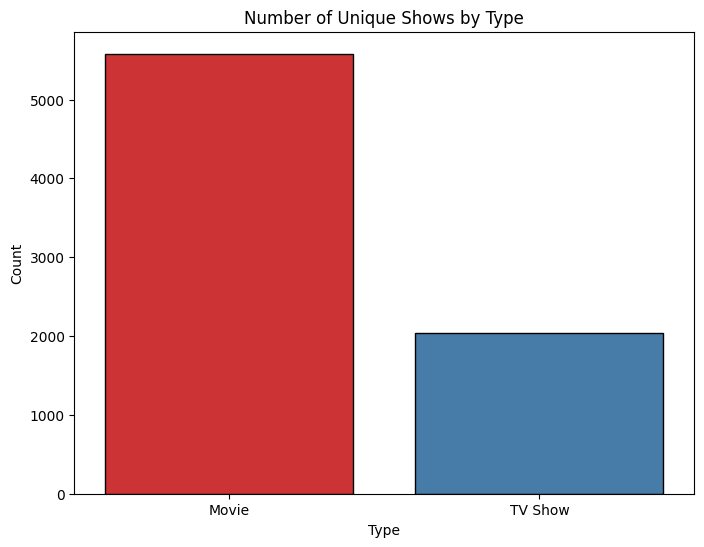

,type,count,percentage
0,Movie,5581,73.3
1,TV Show,2036,26.7


In [ ]:
num_unique_shows = data['show_id'].nunique()
print(f'The number of unique shows in the Netflix dataset is: {num_unique_shows}')

type_distribution = data.groupby('type')['show_id'].nunique().reset_index(name='count')
type_distribution['percentage'] = ((type_distribution['count'] / num_unique_shows) * 100).round(1)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='count', data=type_distribution, palette='Set1', edgecolor='black')
plt.title('Number of Unique Shows by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Displaying the distribution table
display(type_distribution)

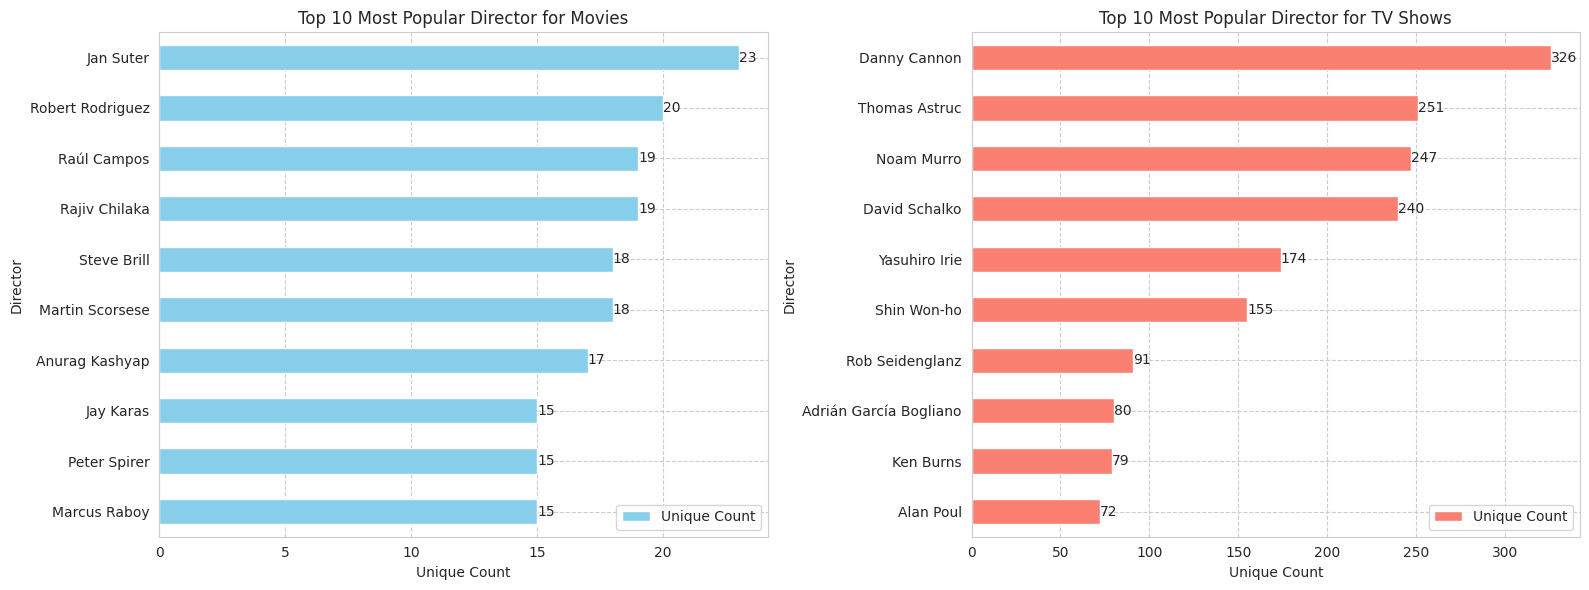

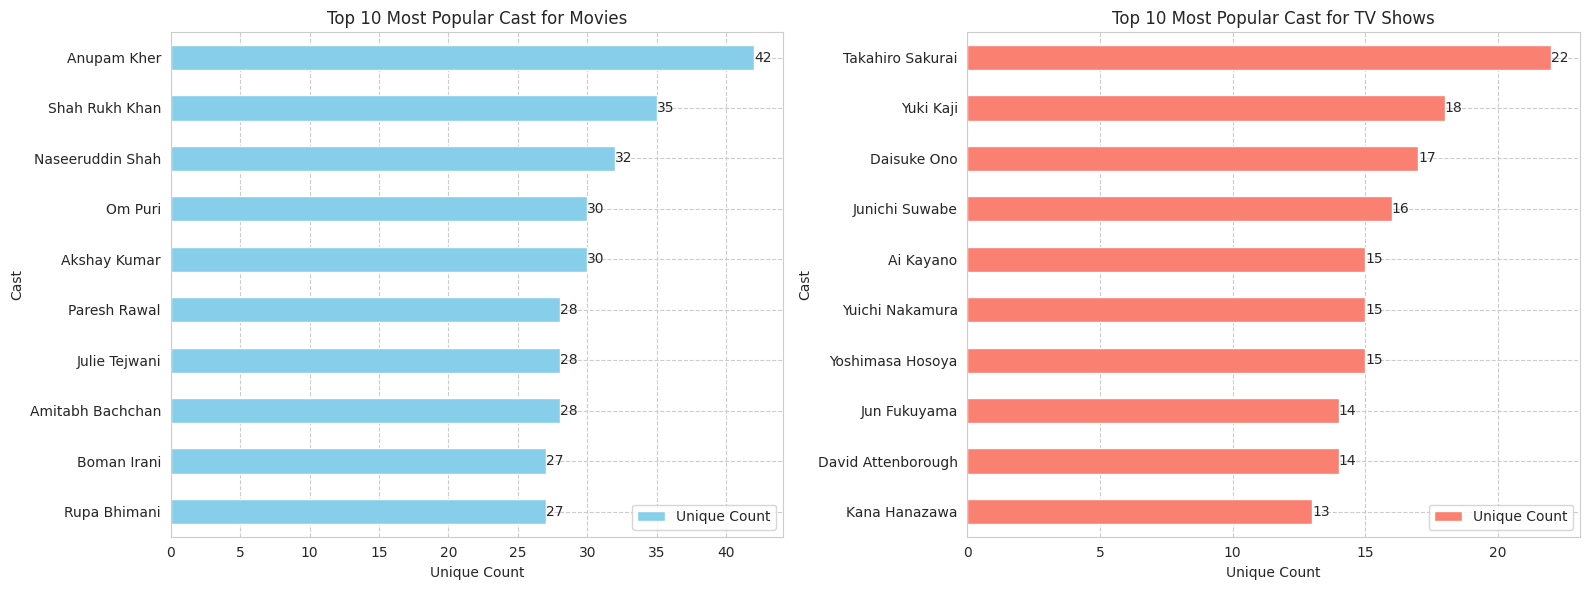

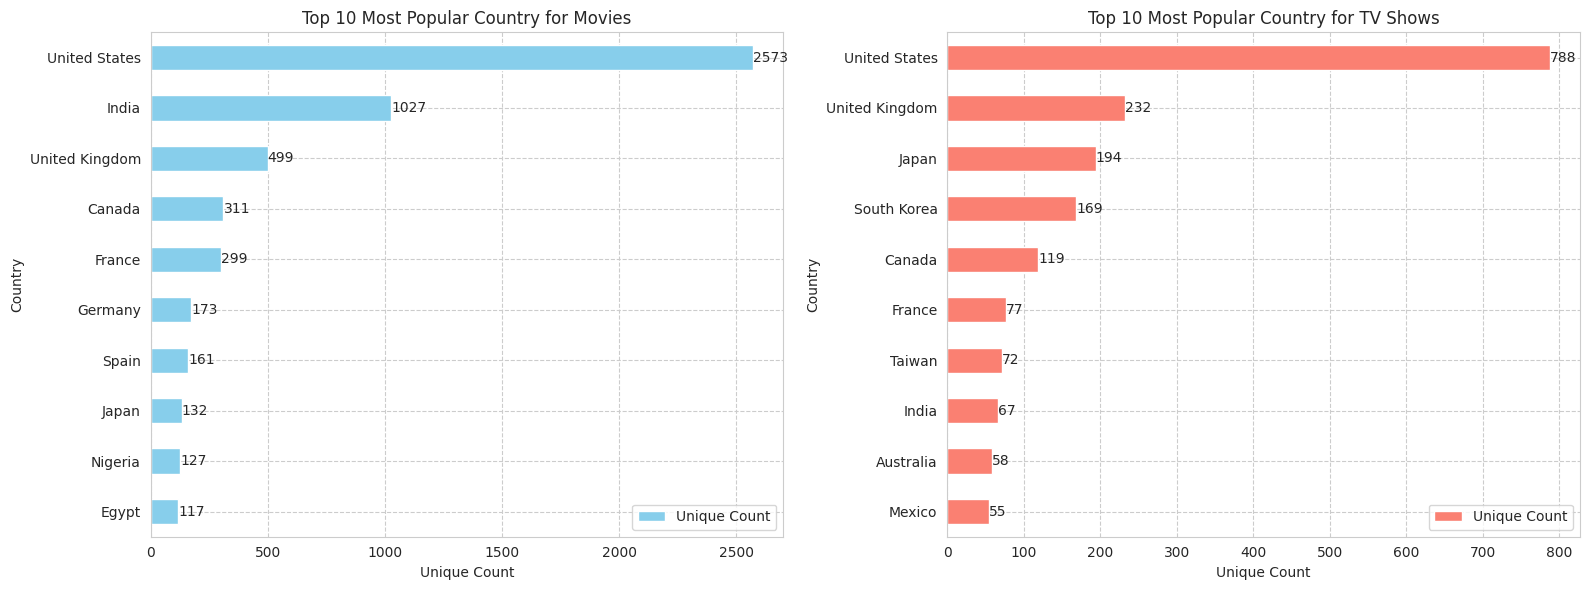

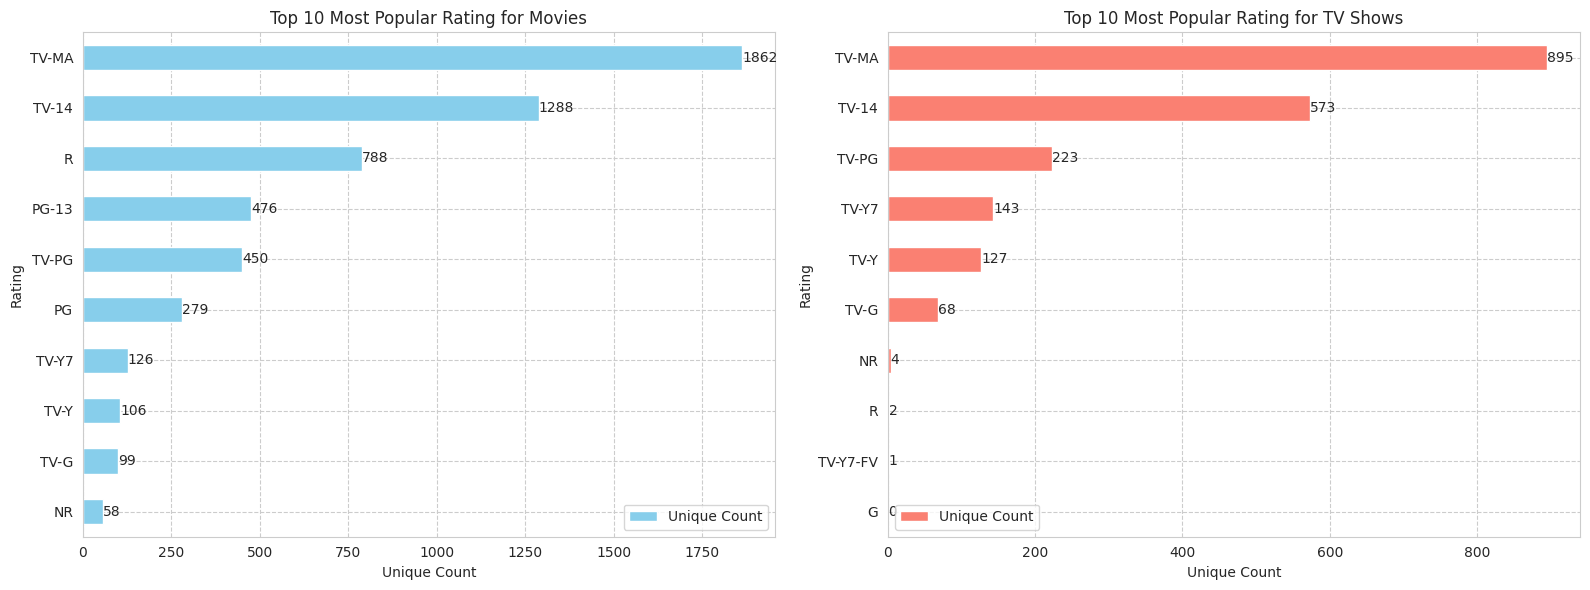

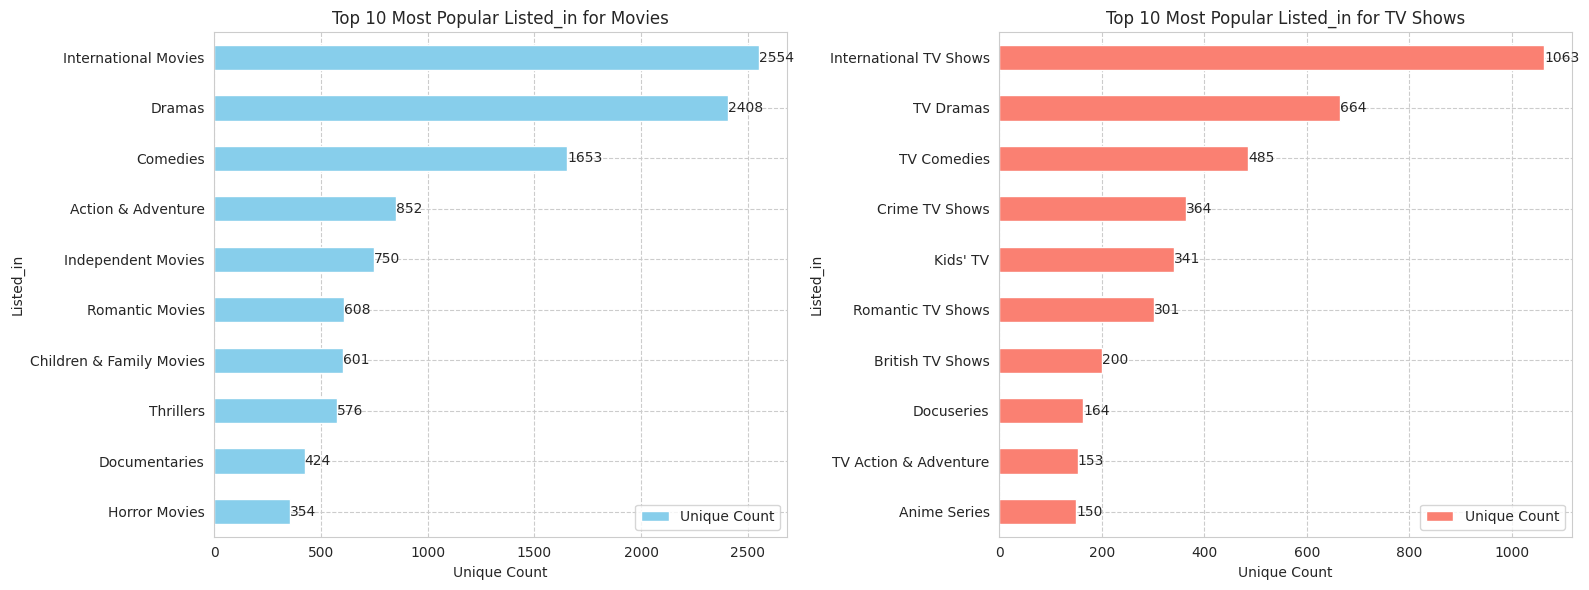

In [ ]:
# Function to perform the aggregation, sorting, and plotting
def top_10_value_counts_plot(data, attribute):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot for Movies
    movies_result = (data[data['type'] == 'Movie']
                    .groupby(attribute)
                    .agg({'show_id': 'nunique'})
                    .rename(columns={'show_id': 'Unique Count'})
                    .sort_values(by='Unique Count', ascending=True)
                    .tail(10))
    ax1 = movies_result.plot(kind='barh', color='skyblue', ax=axs[0])
    ax1.set_title(f'Top 10 Most Popular {attribute.capitalize()} for Movies')
    ax1.set_xlabel('Unique Count')
    ax1.set_ylabel(attribute.capitalize())

    # Add labels to bars in the movie plot
    for index, value in enumerate(movies_result['Unique Count']):
        ax1.text(value, index, str(value), ha='left', va='center')

    # Plot for TV Shows
    tv_shows_result = (data[data['type'] == 'TV Show']
                        .groupby(attribute)
                        .agg({'show_id': 'nunique'})
                        .rename(columns={'show_id': 'Unique Count'})
                        .sort_values(by='Unique Count', ascending=True)
                        .tail(10))
    ax2 = tv_shows_result.plot(kind='barh', color='salmon', ax=axs[1])
    ax2.set_title(f'Top 10 Most Popular {attribute.capitalize()} for TV Shows')
    ax2.set_xlabel('Unique Count')
    ax2.set_ylabel(attribute.capitalize())

    # Add labels to bars in the TV show plot
    for index, value in enumerate(tv_shows_result['Unique Count']):
        ax2.text(value, index, str(value), ha='left', va='center')

    plt.tight_layout()
    plt.show()

# Calculate and display the top 10 value counts for each categorical attribute with subplots
for attribute in categorical_attributes:
    top_10_value_counts_plot(data, attribute)


The above plots aids in providing the following inferences:

1. **Most Popular Directors for Movies:**
   - **Jan Suter** leads with 23 movies directed, followed closely by **Robert Rodriguez** with 20.
   - **Anurag Kashyap** is the only director from India in the top 10, showcasing a diverse range of directors in terms of nationality and style.
   - It seems like there's a mix of established Hollywood directors like **Martin Scorsese** along with directors from different regions like **Raúl Campos**.

2. **Most Popular Directors for TV Shows:**
   - **Danny Cannon** is significantly ahead of others with 326 TV shows directed, possibly indicating a prolific career in television.
   - There's a notable presence of directors from various countries like Japan (**Yasuhiro Irie**), South Korea (**Shin Won-ho**), and Argentina (**Adrián García Bogliano**), showcasing global diversity.

3. **Most Popular Casts for Movies:**
   - The top cast members are dominated by Indian actors like **Anupam Kher**, **Shah Rukh Khan**, and **Naseeruddin Shah**, reflecting the popularity of Indian cinema globally.
   - It's interesting to see a mix of veteran actors like **Amitabh Bachchan** along with relatively newer talents like **Akshay Kumar**.

4. **Most Popular Casts for TV Shows:**
   - The list includes popular Japanese voice actors like **Takahiro Sakurai** and **Yuki Kaji**, indicating the influence of anime and animated series.
   - There's also a presence of international figures like **David Attenborough**, showcasing the popularity of documentary narrators.

5. **Most Popular Countries for Movies:**
   - Unsurprisingly, the United States leads by a significant margin, highlighting Hollywood's dominance in the film industry.
   - India holds a strong second position, which aligns with the popularity of Bollywood and the Indian film industry worldwide.
   - Other countries like the UK, Canada, and France also have a notable presence, indicating the global nature of cinema production.

6. **Most Popular Countries for TV Shows:**
   - The United States again leads, but there's a significant presence of other countries like the UK, Japan, and South Korea, reflecting the global appeal of TV content.
   - The presence of countries like Taiwan and Australia in the top 10 indicates a diverse range of TV productions from various regions.

7. **Most Popular Ratings for Movies:**
   - **TV-MA** and **TV-14** are the most popular ratings, suggesting that mature and teenage audiences are the primary target for movies.
   - The presence of ratings like **PG-13** and **PG** indicates a significant portion of family-friendly content as well.

8. **Most Popular Ratings for TV Shows:**
   - Similar to movies, **TV-MA** and **TV-14** are the most popular ratings for TV shows, indicating a preference for mature content.
   - However, there's also a notable presence of family-friendly ratings like **TV-PG** and **TV-Y7**, showcasing a diverse range of content preferences among viewers.

9. **Most Popular Listed_ins for Movies:**
   - **International Movies** and **Dramas** are the most popular genres, suggesting a global appetite for diverse storytelling.
   - Genres like **Comedies**, **Action & Adventure**, and **Romantic Movies** also have a significant presence, indicating a diverse range of audience preferences.

10. **Most Popular Listed_ins for TV Shows:**
    - **International TV Shows** and **TV Dramas** lead the list, showcasing a global interest in drama series from various regions.
    - Genres like **Crime TV Shows**, **Kids' TV**, and **Romantic TV Shows** also have a strong presence, indicating diverse audience preferences in television content.


In [ ]:
# Define aggregation functions for each attribute

aggregations = {
    'title': 'first',                          # Select the first occurrence of title
    'director': 'first',                       # Select the first occurrence of director
    'cast': lambda x: ', '.join(set(x)),       # Join unique values of cast
    'listed_in': lambda x: ', '.join(set(x)),  # Join unique values of listed_in
    'country': lambda x: ', '.join(set(x)),    # Join unique values of country
    'type': 'first',                           # Select the first occurrence of type
    'date_added': 'first',                     # Select the first occurrence of date_added
    'release_year': 'first',                   # Select the first occurrence of release_year
    'rating': 'first',                         # Select the first occurrence of rating
    'duration': 'first',                       # Select the first occurrence of duration
    'num_of_seasons': 'first',                 # Select the first occurrence of num_of_seasons
    'movie_duration': 'first',                 # Select the first occurrence of movie_duration
    'description': 'first'                     # Select the first occurrence of description
}


# Aggregate the data
aggregated_data = data.groupby('show_id').agg(aggregations).reset_index()
aggregated_data[:5]

,show_id,title,director,cast,listed_in,country,type,date_added,release_year,rating,duration,num_of_seasons,movie_duration,description
0,s10,The Starling,Theodore Melfi,"Skyler Gisondo, Melissa McCarthy, Loretta Devi...","Comedies, Dramas",United States,Movie,2021-09-24,2021,PG-13,104 min,0,104,A woman adjusting to life after a loss contend...
1,s100,On the Verge,Olivier Jean-Marie,"Elisabeth Shue, Timm Sharp, Alexia Landeau, Tr...","TV Dramas, TV Comedies","France, United States",TV Show,2021-09-07,2021,TV-MA,1 Season,1,0,"Four women — a chef, a single mom, an heiress ..."
2,s1000,Stowaway,Joe Penna,"Shamier Anderson, Toni Collette, Daniel Dae Ki...","Dramas, Thrillers, International Movies","Germany, United States",Movie,2021-04-22,2021,TV-MA,116 min,0,116,A three-person crew on a mission to Mars faces...
3,s1001,Wild Dog,Ahishor Solomon,"Saiyami Kher, Atul Kulakarni, Bilal Hussain, D...","International Movies, Action & Adventure",India,Movie,2021-04-22,2020,TV-MA,126 min,0,126,A brash but brilliant Indian intelligence agen...
4,s1002,Oloibiri,Curtis Graham,"Ifeanyi Williams, William R. Moses, Taiwo Ajai...","Dramas, Thrillers, International Movies","Nigeria, United States, Canada",Movie,2021-04-21,2015,TV-14,86 min,0,86,"After drilling depletes a small village, a cor..."


In [ ]:
print("Number of Rows in aggregated_data:", aggregated_data.shape[0])
print("Columns in aggregated_data:", list(aggregated_data.columns))


Number of Rows in aggregated_data: 7617
Columns in aggregated_data: ['show_id', 'title', 'director', 'cast', 'listed_in', 'country', 'type', 'date_added', 'release_year', 'rating', 'duration', 'num_of_seasons', 'movie_duration', 'description']


In [ ]:
aggregated_data.rating.unique()

['PG-13', 'TV-MA', 'TV-14', 'TV-Y', 'TV-Y7', ..., 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']
Length: 14
Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

<br>

> **Univariant Analysis on the distribution of release_year**

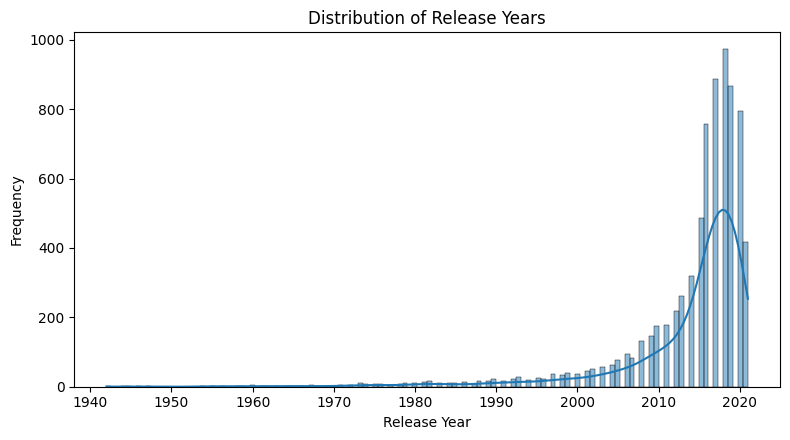

count    7617.000000
mean     2013.803597
std         8.849214
min      1942.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


In [ ]:
# Distribution plot for release_year

plt.figure(figsize=(8, 4.5))
sns.histplot(aggregated_data['release_year'], kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary statistics for release_year
print(aggregated_data['release_year'].describe())


- Dataset comprises 7617 entries spanning 1942 to 2021.
- Mean release year stands at 2013.80, indicating the average entry's release period.
- Standard deviation of 8.85 suggests moderate variability around the mean.
- Quartiles depict temporal trend:
  - 25% of entries pre-2013.
  - 50% pre-2017.
  - 75% pre-2019.
- Range from 1942 to 2021 showcases temporal diversity within the dataset.

---


> **Univariant Analysis on the distribution of Netflix Shows**

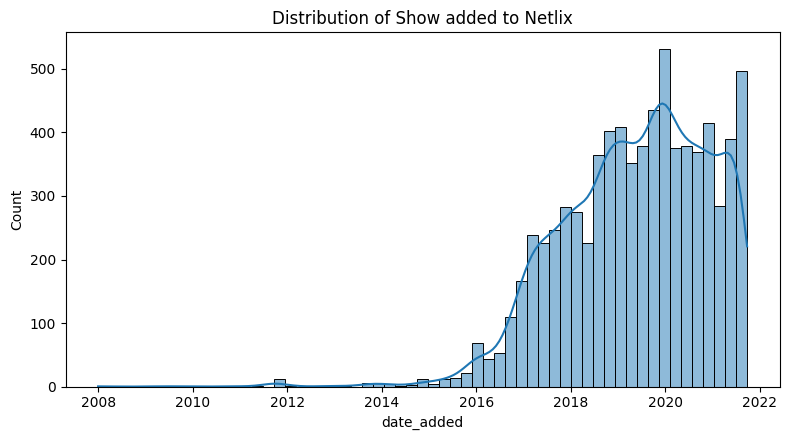

count                             7617
mean     2019-05-18 03:01:40.669554944
min                2008-01-01 00:00:00
25%                2018-04-19 00:00:00
50%                2019-07-18 00:00:00
75%                2020-08-07 00:00:00
max                2021-09-24 00:00:00
Name: date_added, dtype: object


In [ ]:
# Distribution plot for date_added
plt.figure(figsize=(8, 4.5))
sns.histplot(aggregated_data['date_added'], kde=True)
plt.title('Distribution of Show added to Netlix')
plt.tight_layout()
plt.show()

# Summary statistics for date_added
print(aggregated_data['date_added'].describe())

Based on the summary statistics of the `date_added` column:

1. **Dataset Size**: It contains 7617 entries.
2. **Mean Date Added**: The average date added is May 18, 2019, indicating a relatively recent addition trend.
3. **Earliest Addition**: The earliest addition was on January 1, 2008.
4. **Temporal Trend**:
   - 25% of entries were added before or on April 19, 2018.
   - 50% were added before or on July 18, 2019.
   - 75% were added before or on August 7, 2020.
5. **Latest Addition**: The most recent addition was on September 24, 2021.


> **Univariant Analysis on how many days will the movie be added to Netflix after its release?**

The time difference between the release year and the date added to Netflix.

In [ ]:
aggregated_data.columns

Index(['show_id', 'title', 'director', 'cast', 'listed_in', 'country', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'num_of_seasons',
       'movie_duration', 'description', 'time_lag'],
      dtype='object')

  show_id  release_year date_added  release_year_mid  difference
0     s10          2021 2021-09-24            2021.5        -0.5
1    s100          2021 2021-09-07            2021.5        -0.5
2   s1000          2021 2021-04-22            2021.5        -0.5
3   s1001          2020 2021-04-22            2020.5         0.5
4   s1002          2015 2021-04-21            2015.5         5.5
5   s1003          2021 2021-04-21            2021.5        -0.5
6   s1004          2021 2021-04-21            2021.5        -0.5
7   s1005          2021 2021-04-20            2021.5        -0.5
8   s1007          2018 2021-04-20            2018.5         2.5
9   s1008          2017 2021-04-20            2017.5         3.5
Mode of duration difference: -0.5


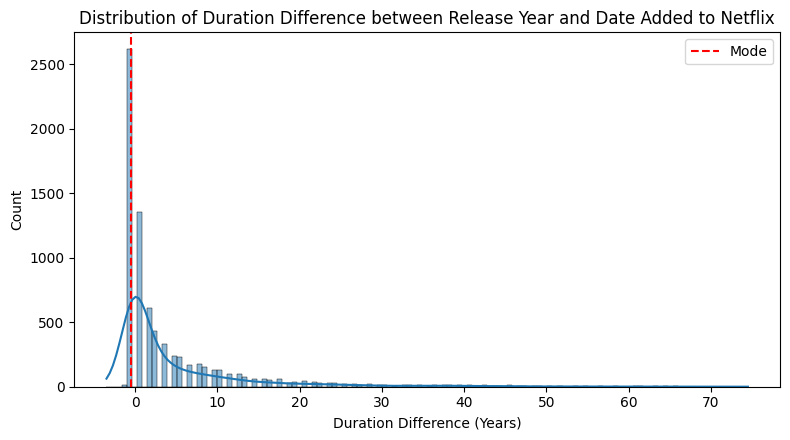

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting necessary columns and calculating mid of release year
subset_data = aggregated_data[['show_id', 'release_year', 'date_added']]
subset_data['release_year_mid'] = subset_data['release_year'] + 0.5  # Assuming mid of the year

# Calculating the difference between mid of release year and date added
subset_data['difference'] = subset_data['date_added'].dt.year - subset_data['release_year_mid']

# Displaying the head of the DataFrame
print(subset_data.head(10))

# Finding the mode of the duration difference
mode_duration_difference = subset_data['difference'].mode()[0]
print("Mode of duration difference:", mode_duration_difference)

# Plotting histogram of duration difference
plt.figure(figsize=(8, 4.5))
sns.histplot(subset_data['difference'], kde=True)
plt.axvline(x=mode_duration_difference, color='red', linestyle='--', label='Mode')
plt.title('Distribution of Duration Difference between Release Year and Date Added to Netflix')
plt.xlabel('Duration Difference (Years)')
plt.legend()
plt.tight_layout()
plt.show()


**Inference:**

- When we look at the data, it shows that most movies are being added to Netflix about six months after they're released.
- This delay isn't good for Netflix because it means people have to wait a long time to watch new movies on the platform.
- To fix this, Netflix could try to add movies sooner after they come out.
- That way, people can watch them right away, which would make Netflix more popular and successful.
- They could do this by figuring out what kinds of movies people like the most, making deals to get movies faster, or making their own movies to show exclusively on Netflix.
- By doing these things, Netflix can make sure people have more reasons to watch and love their service.

> **Univariant Analysis on the distribution plot for Movie Duration and TV Show Number of Seasons**

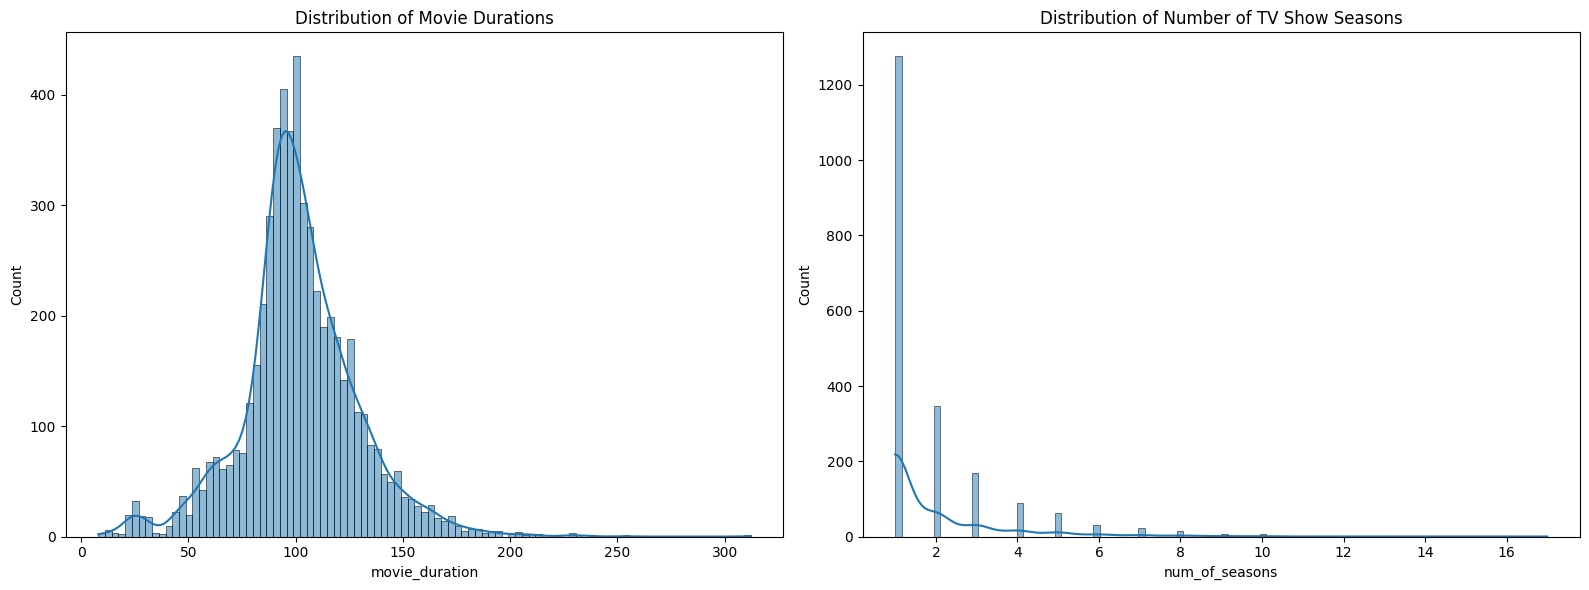

count    5581.000000
mean      101.800932
std        27.367255
min         8.000000
25%        88.000000
50%       100.000000
75%       116.000000
max       312.000000
Name: movie_duration, dtype: float64

count    2036.000000
mean        1.894892
std         1.690195
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: num_of_seasons, dtype: float64

In [ ]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Distribution plot for movie_duration
sns.histplot(aggregated_data['movie_duration'][aggregated_data['type']=="Movie"], kde=True, ax=axs[0])
axs[0].set_title('Distribution of Movie Durations')

# Distribution plot for num_of_seasons
sns.histplot(aggregated_data['num_of_seasons'][aggregated_data['type']=="TV Show"], kde=True, ax=axs[1])
axs[1].set_title('Distribution of Number of TV Show Seasons')

# Adjust layout
plt.tight_layout()
plt.show()

display(aggregated_data['movie_duration'][aggregated_data['type']=="Movie"].describe(),aggregated_data['num_of_seasons'][aggregated_data['type']=="TV Show"].describe() )

>**Univariate Analysis on Movie Durations and TV Show Seasons**



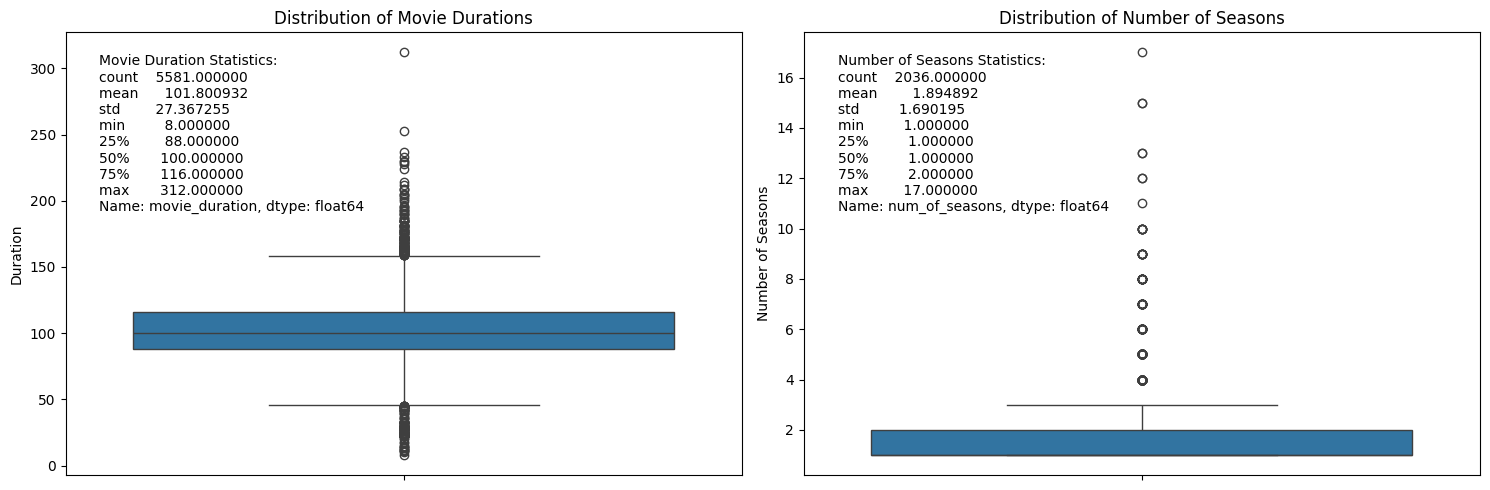

In [ ]:
# Filter out NaN values in the 'duration' column
duration_data = aggregated_data.dropna(subset=['duration'])

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot box plot for movie duration
sns.boxplot(ax=axes[0], data=duration_data[duration_data['type'] == 'Movie'], y='movie_duration')
axes[0].set_title('Distribution of Movie Durations')
axes[0].set_ylabel('Duration')

# Calculate statistics for movie durations
movie_duration_stats = duration_data[duration_data['type'] == 'Movie']['movie_duration'].describe()

# Add labels for movie duration statistics
axes[0].text(0.05, 0.95, f"Movie Duration Statistics:\n{movie_duration_stats}",
             transform=axes[0].transAxes, fontsize=10, verticalalignment='top')

# Plot box plot for number of seasons for TV shows
sns.boxplot(ax=axes[1], data=duration_data[duration_data['type'] == 'TV Show'], y='num_of_seasons')
axes[1].set_title('Distribution of Number of Seasons')
axes[1].set_ylabel('Number of Seasons')

# Calculate statistics for number of seasons
num_seasons_stats = duration_data[duration_data['type'] == 'TV Show']['num_of_seasons'].describe()

# Add labels for number of seasons statistics
axes[1].text(0.05, 0.95, f"Number of Seasons Statistics:\n{num_seasons_stats}",
             transform=axes[1].transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()


- **Movie Duration Distribution**:
  - The histogram illustrates a wide range of movie durations, with a mean of approximately 101.80 minutes.
  - A moderate standard deviation of 27.37 minutes indicates some variability in movie lengths.
  - The shortest movie duration observed is 8 minutes, while the longest is 312 minutes, suggesting diverse content.
- **TV Show Seasons Distribution**:
  - The histogram demonstrates a distribution skewed towards fewer seasons per TV show, with a mean of around 1.89 seasons.
  - Most TV shows have either 1 or 2 seasons, with outliers extending up to 17 seasons.
  - The standard deviation of 1.69 seasons highlights variability in the number of seasons per show.

> **Univariant Analysis: Temporal Trend Analysis in Show Releases: Top 5 Countries**

Analyze the number of shows added to Netflix over time, broken down by their release year

In [ ]:
# Pivot table
d = pd.pivot_table(aggregated_data,
                   index="country",
                   columns="type",
                   values="show_id",
                   aggfunc="nunique"
                       ).rename(columns={"TV Show": "TV_Show"})
d["Total_Shows"] = d["Movie"] + d["TV_Show"]

top_5_country_wt_most_shows =(d
                              .query("Movie > 0 and TV_Show > 0")
                              .sort_values(by="Total_Shows", ascending=False)
                              )[:5]


temp = data[data["country"].isin(top_5_country_wt_most_shows.index)]

# Grouping by 'release_year' and 'country', counting distinct shows, and resetting index
grouped = temp.groupby(['release_year', 'country'])['show_id'].nunique().reset_index()

# Ranking the distinct show counts within each 'release_year' group for each country
grouped['rank'] = grouped.groupby('release_year')['show_id'].rank(ascending=False, method='first')

grouped.rename(columns={'show_id': 'distinct_show_count'}, inplace=True)
grouped.sample(10)


,release_year,country,distinct_show_count,rank
24,1967,United States,4,1.0
44,1976,United States,5,1.0
13,1961,United Kingdom,1,1.0
100,1995,Japan,1,3.0
32,1972,India,2,1.0
77,1988,Japan,1,3.0
211,2019,United States,375,1.0
63,1983,India,4,1.0
180,2013,United Kingdom,25,3.0
124,2001,Japan,2,4.0


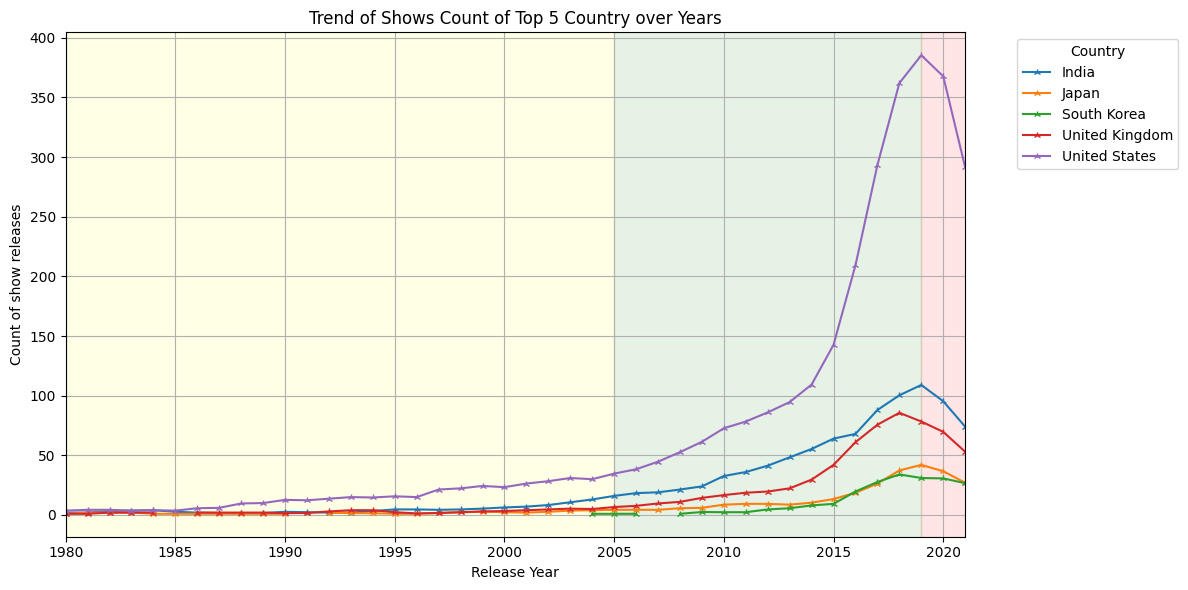

In [ ]:
pivot_table = (grouped.
               pivot(index="release_year",
                     columns="country",
                     values="distinct_show_count"
                     )
               )

# Applying rolling mean to smooth the lines
pivot_table_smoothed = pivot_table.rolling(window=3, min_periods=1).mean()

# Plotting multiline chart with smoothed data
ax = pivot_table_smoothed.plot(marker='2',
                               markersize=5,
                               figsize=(12, 6))

plt.title('Trend of Shows Count of Top 5 Country over Years')
plt.xlabel('Release Year')
plt.ylabel('Count of show releases')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xlim([1980, 2021])

# Yellow band
start_year = 1980
end_year = 2005
ax.axvspan(start_year, end_year, color='yellow', alpha=0.1)  # Reduced alpha for more transparency

# Green band
start_year = 2005
end_year = 2019
ax.axvspan(start_year, end_year, color='green', alpha=0.1)  # Reduced alpha for more transparency

# Red band
start_year = 2019
end_year = 2022
ax.axvspan(start_year, end_year, color='red', alpha=0.1)  # Reduced alpha for more transparency

plt.show()


In this analysis, we are examining the trend of show counts in the top five countries over a year: India, Japan, South Korea, the United Kingdom, and the United States. We are observing the number of shows released with respect to time, divided into three phases:

1. **1980-2005 (Yellow Zone):**
   - During this extended period, the release count of shows remained relatively low.
   - None of the five countries exceeded the release of 50 shows per year.
   - This phase indicates a period of subtle growth or stagnation in the number of shows produced annually.

2. **2005-2019 (Green Zone):**
   - This phase shows a significant upward trend in the number of shows released in all five countries.
   - The United States experienced the most substantial increase compared to the other four countries.
   - The release of shows peaked in 2019, demonstrating a robust growth phase in the TV and film industry across these nations.

3. **2019-2021 (Red Zone):**
   - This period coincides with the onset of the `COVID-19 pandemic`, specifically the first wave.
   - There is a noticeable decline in the number of shows released, likely due to the disruptions caused by the pandemic.
   - The pandemic's impact on production and release schedules is a plausible reason for the reduced number of shows during this time.

The analysis highlights how external factors such as global health crises can significantly affect the entertainment industry, causing fluctuations in production and release trends.

> **Univariate Analysis on Temporal Trends: Country Ranking in Show Releases**

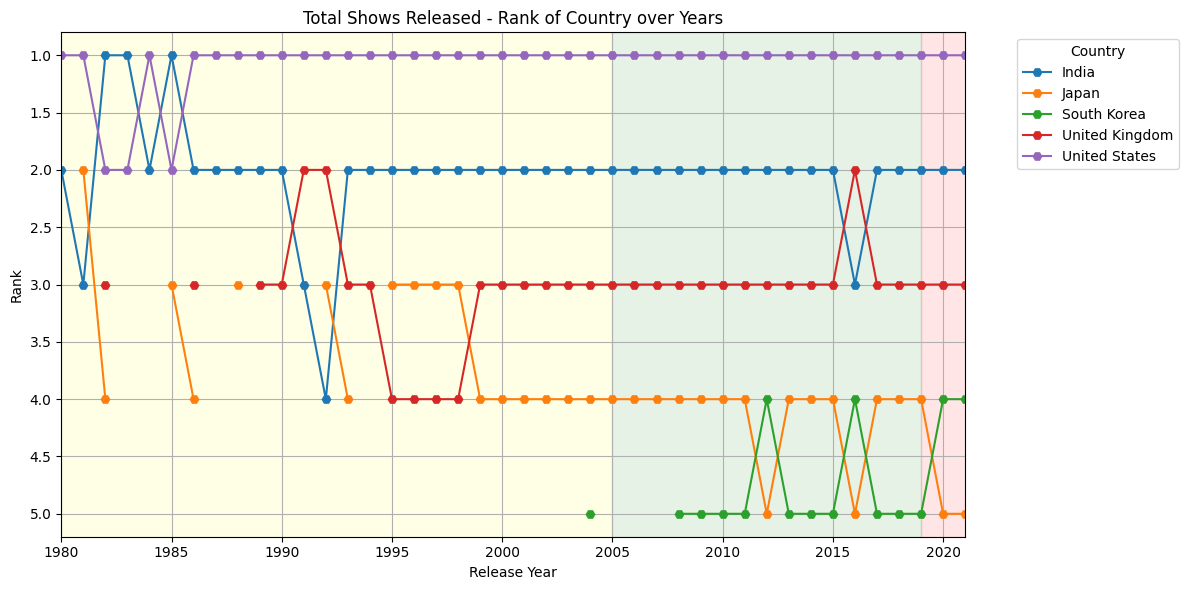

In [ ]:
pivot_table = (grouped.
               pivot(index="release_year", columns="country", values="rank")
               )

# Plotting multiline chart
ax = pivot_table.plot(marker='H', figsize=(12, 6))
plt.title('Total Shows Released - Rank of Country over Years')
plt.xlabel('Release Year')
plt.ylabel('Rank')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xlim([1980, 2021])

# Inverting the y-axis
ax.invert_yaxis()

# Yellow band
start_year = 1980
end_year = 2005
ax.axvspan(start_year, end_year, color='yellow', alpha=0.1)  # Reduced alpha for more transparency

# Green band
start_year = 2005
end_year = 2019
ax.axvspan(start_year, end_year, color='green', alpha=0.1)  # Reduced alpha for more transparency

# Red band
start_year = 2019
end_year = 2022
ax.axvspan(start_year, end_year, color='red', alpha=0.1)  # Reduced alpha for more transparency

plt.show()


The above rank viz validated the result we found earlier.

> **Univariate Analysis: Distribution of Movies and TV Shows by Release Year and Rating**

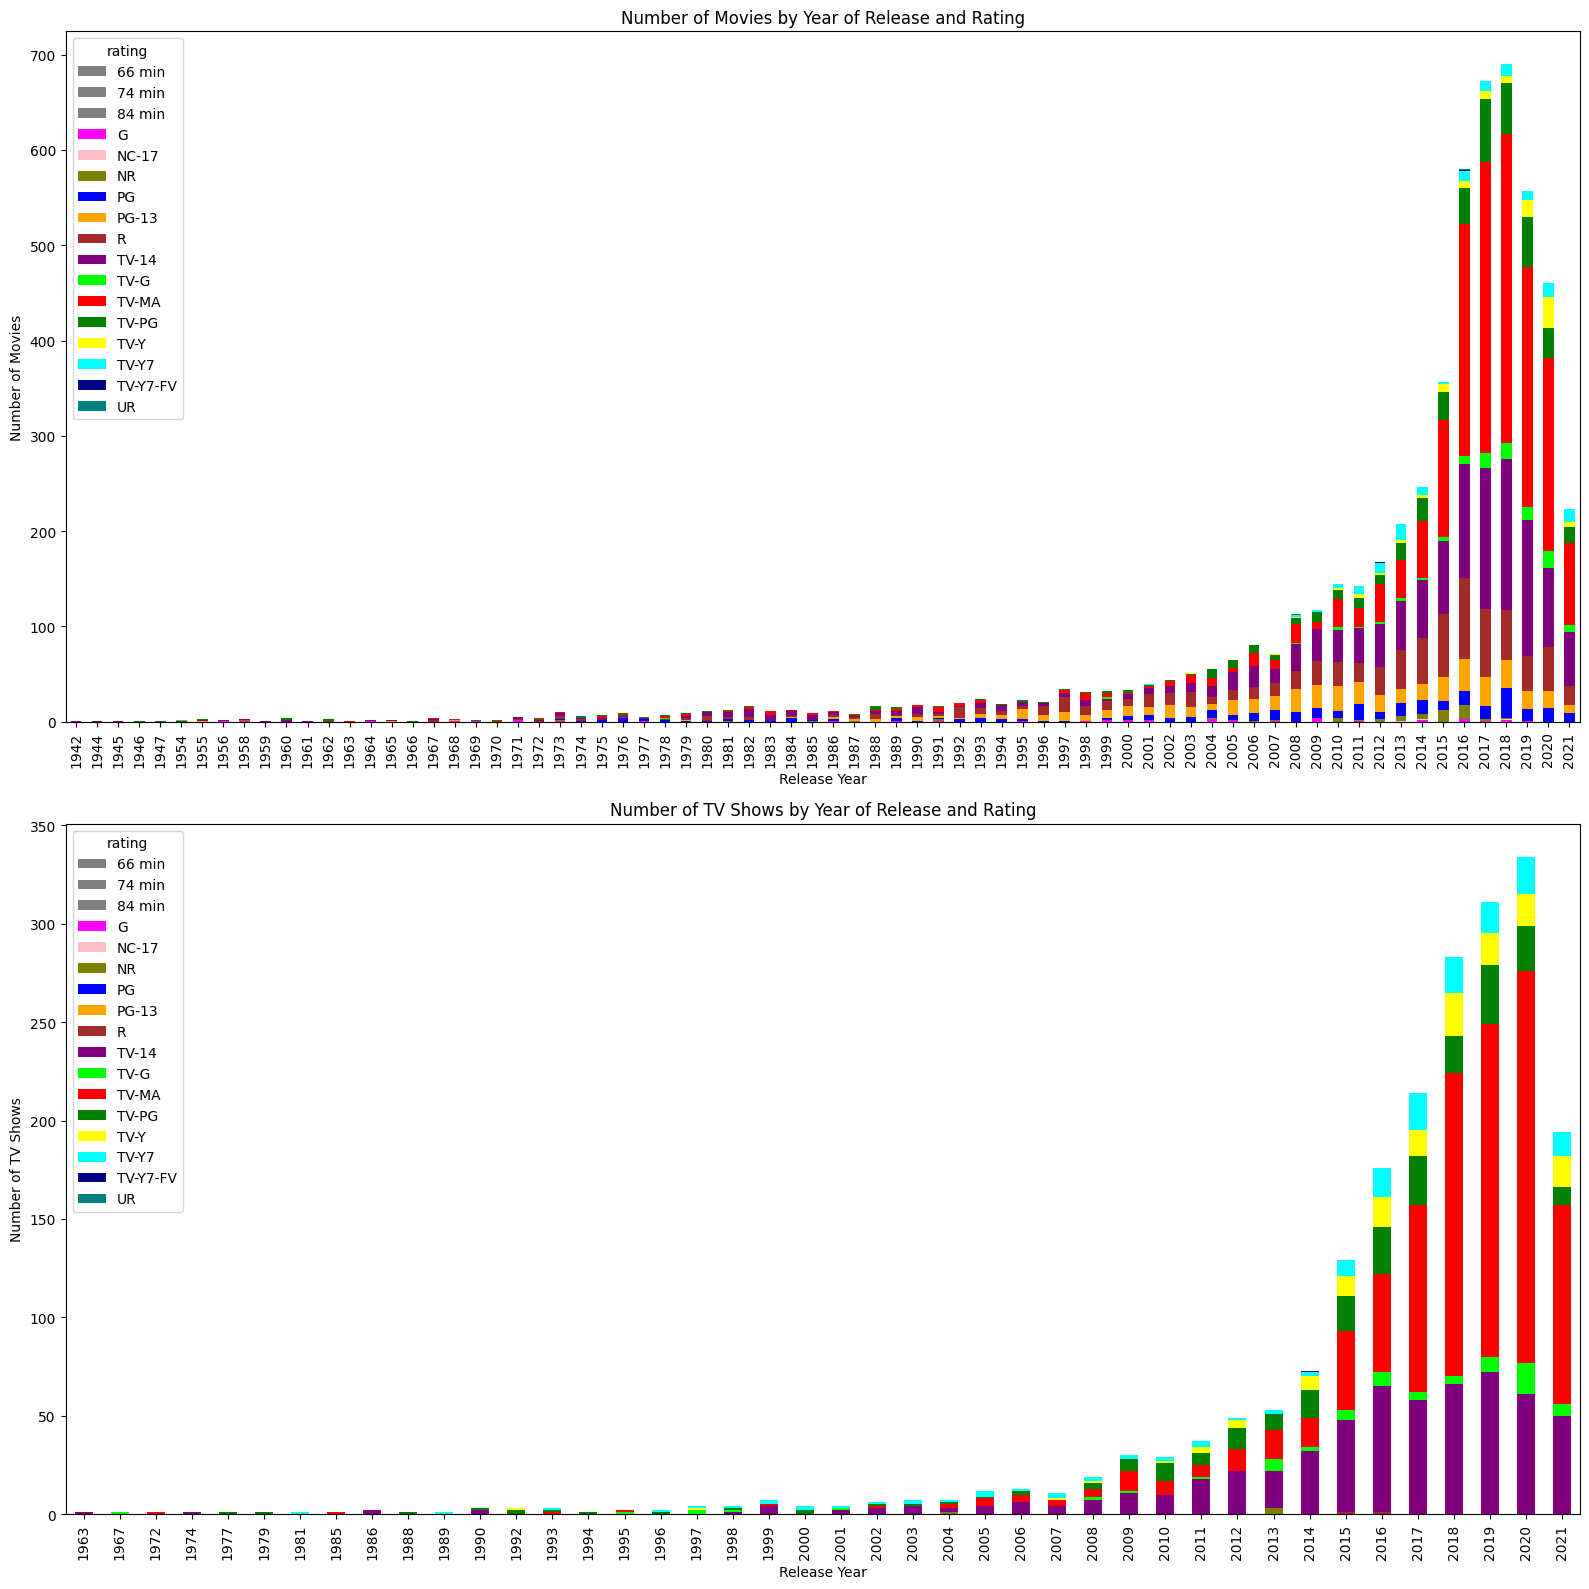

In [ ]:
# Define colors for each rating level
rating_colors = {
    'PG-13': 'orange',
    'TV-MA': 'red',
    'PG': 'blue',
    'TV-14': 'purple',
    'TV-PG': 'green',
    'TV-Y': 'yellow',
    'TV-Y7': 'cyan',
    'R': 'brown',
    'TV-G': 'lime',
    'G': 'magenta',
    'NC-17': 'pink',
    'NR': 'olive',
    'TV-Y7-FV': 'navy',
    'UR': 'teal'
}

# Create a figure and increase the figure size
fig, axs = plt.subplots(2, 1, figsize=(16, 16))

# Aggregate data for movies and TV shows by release year and rating
movies_grouped = aggregated_data[aggregated_data['type'] == 'Movie'].groupby(['release_year', 'rating']).size().unstack(fill_value=0)
tv_shows_grouped = aggregated_data[aggregated_data['type'] == 'TV Show'].groupby(['release_year', 'rating']).size().unstack(fill_value=0)

# Plot stacked bar plots for movies
movies_grouped.plot(kind='bar', stacked=True, ax=axs[0], color=[rating_colors.get(x, 'gray') for x in movies_grouped.columns])
axs[0].set_title('Number of Movies by Year of Release and Rating')
axs[0].set_xlabel('Release Year')
axs[0].set_ylabel('Number of Movies')

# Plot stacked bar plots for TV shows
tv_shows_grouped.plot(kind='bar', stacked=True, ax=axs[1], color=[rating_colors.get(x, 'gray') for x in tv_shows_grouped.columns])
axs[1].set_title('Number of TV Shows by Year of Release and Rating')
axs[1].set_xlabel('Release Year')
axs[1].set_ylabel('Number of TV Shows')

# Show the plots
plt.tight_layout()
plt.show()

We can observe TV MA rating has exponenetially grown since 2014, among both TV Shows and Movies.

The number of unique shows in the Netflix dataset is: 7617


,type,count,percentage
0,Movie,5581,73.3
1,TV Show,2036,26.7


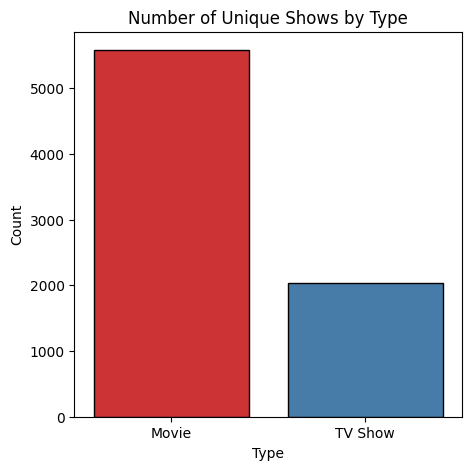

In [ ]:
num_unique_shows = data['show_id'].nunique()
print(f'The number of unique shows in the Netflix dataset is: {num_unique_shows}')

# Movies and TV Shows Count ------------------------------------------------------------------------------

agg_para = {"show_id": "nunique"}
type_distribution = (data
                     .groupby(["type"])
                     .agg(agg_para)
                     .reset_index()
                     .rename(columns={"show_id": "count"})
                    )
type_distribution['percentage'] = ((type_distribution['count'] / num_unique_shows) * 100).round(1)

display(type_distribution)

# Plot ---------------------------------------------------------------------------------------------------

fig = plt.subplots(figsize=(5, 5))
# sns.set_palette(sns.color_palette("deep", 2))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.barplot(x='type',
            y='count',
            data=type_distribution,
            hue='type',
            dodge=False,
            palette = "Set1",
            legend=False,
            edgecolor = "black"
            )

plt.title('Number of Unique Shows by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# **6. Multivariate Analysis**

-- Count of Shows vs Year

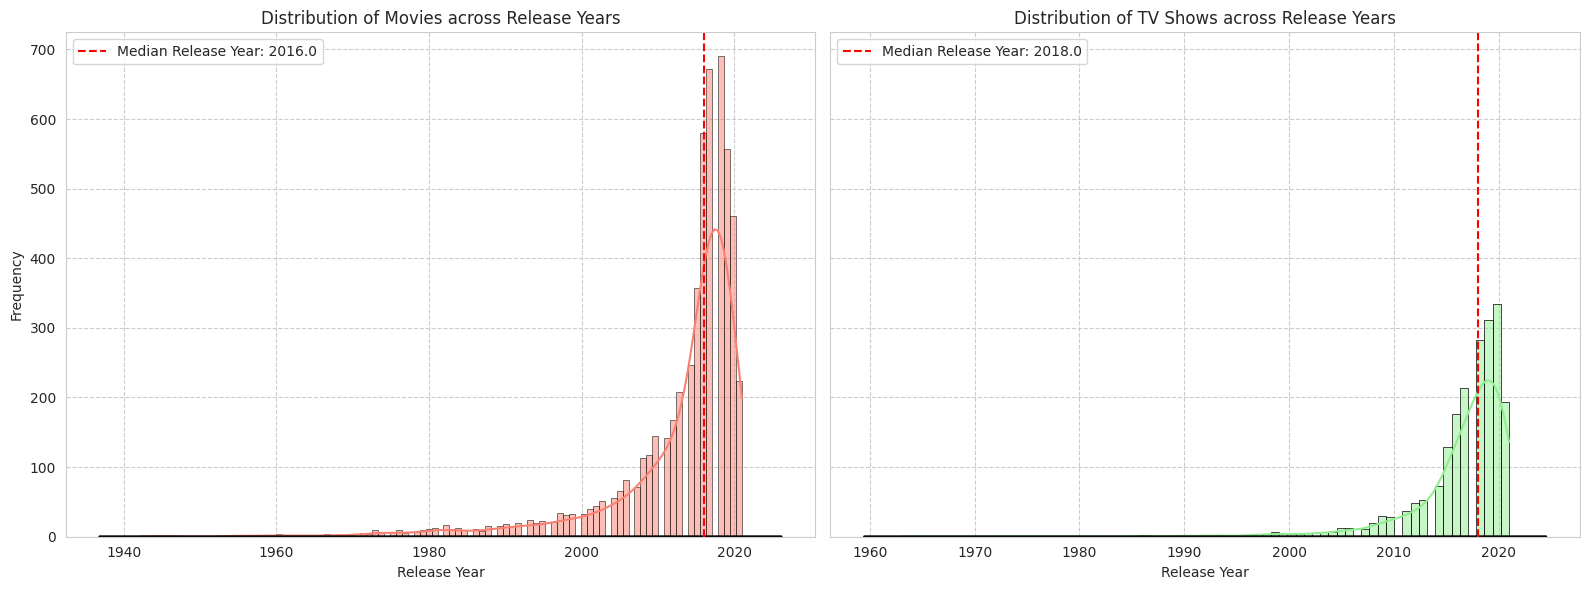

In [ ]:
# Filter aggregated data for movies and TV shows
movies_data = aggregated_data[aggregated_data['type'] == 'Movie']
tv_shows_data = aggregated_data[aggregated_data['type'] == 'TV Show']

# Set up the figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for movies
sns.histplot(movies_data['release_year'], kde=True, edgecolor='black', ax=axs[0], color='salmon')
sns.kdeplot(movies_data['release_year'], color='black', linewidth=2, ax=axs[0])  # Adjusting KDE line thickness and color
axs[0].set_title('Distribution of Movies across Release Years')
axs[0].set_xlabel('Release Year')
axs[0].set_ylabel('Frequency')

# Add vertical line for median release year for movies
median_release_year_movies = movies_data['release_year'].median()
axs[0].axvline(median_release_year_movies, color='red', linestyle='--', label=f'Median Release Year: {median_release_year_movies}')
axs[0].legend()

# Plot for TV shows
sns.histplot(tv_shows_data['release_year'], kde=True, edgecolor='black', ax=axs[1], color='lightgreen')
sns.kdeplot(tv_shows_data['release_year'], color='black', linewidth=2, ax=axs[1])  # Adjusting KDE line thickness and color
axs[1].set_title('Distribution of TV Shows across Release Years')
axs[1].set_xlabel('Release Year')

# Add vertical line for median release year for TV shows
median_release_year_tv_shows = tv_shows_data['release_year'].median()
axs[1].axvline(median_release_year_tv_shows, color='red', linestyle='--', label=f'Median Release Year: {median_release_year_tv_shows}')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import plotly.express as px

data['date_added'] = pd.to_datetime(data['date_added'])
data['month_added'] = data['date_added'].dt.strftime('%B')

# Group by month_added and type and count unique shows
monthly_show_counts = data.groupby(['month_added', 'type'])['show_id'].nunique().unstack(fill_value=0)

# Calculate total shows
monthly_show_counts['total_shows'] = monthly_show_counts.sum(axis=1)

# Sort by total shows
monthly_show_counts_sorted = monthly_show_counts.sort_values(by='total_shows', ascending=False)

# Plot the funnel chart
fig_funnel = px.funnel(monthly_show_counts_sorted.reset_index(),
                       x=['Movie', 'TV Show'],
                       y='month_added',
                       title='Month-wise Unique Show_id Distribution for Movies and TV Shows'
                      )

fig_funnel.show()

**Inference:**

The above chart represents a funnel pattern, showcasing January and December as the two consecutive months where a major portion of movies and TV shows are released. This trend might be attributed to the festivities during those months. Additionally, we observe July and October as disconnected points, holding a significantly higher proportion.

In [ ]:
df.rating.unique()

['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., 'NC-17', NaN, 'NR', 'TV-Y7-FV', 'UR']
Length: 15
Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

<ipython-input-70-8c47eade79b7>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




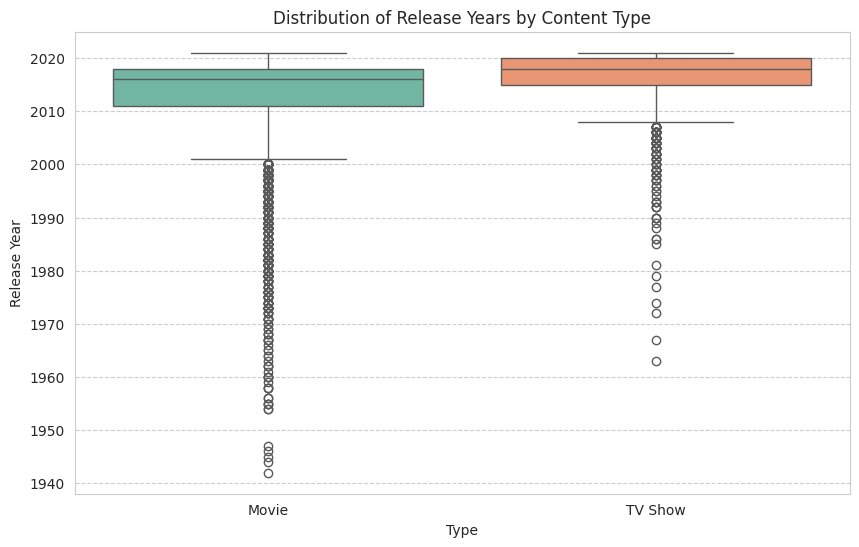

In [ ]:
# Boxplot for type vs. release_year
plt.figure(figsize=(10, 6))

sns.boxplot(x='type',
            y='release_year',
            data=aggregated_data,
            palette='Set2'
            )

plt.title('Distribution of Release Years by Content Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

The box plot above shows the distribution of release years for movies and TV shows on Netflix. The key points you mentioned are:

- The Y-axis represents the release year, and the X-axis represents the types (movies and TV shows).
- The interquartile range (IQR) for both movies and TV shows mostly lies between 2010 and 2020.
- TV shows have a significant number of outliers, indicating some older shows.
- Movies have a wider range, with some dating back to the 1940s and extending to the early 2000s.

In [ ]:

unique_shows_per_year_type = data.groupby(['release_year', 'type'])['show_id'].nunique().reset_index()

# Renaming columns for clarity
unique_shows_per_year_type.columns = ['release_year', 'type', 'unique_shows']

# Creating the pivot table
table1 = pd.pivot_table(unique_shows_per_year_type,
                        index="release_year",
                        columns="type",
                        values="unique_shows",
                        aggfunc="sum")

# Filling missing values with 0
table1 = table1.fillna(0)

# Adding Total and percentage columns
table1["Total"] = table1["Movie"] + table1["TV Show"]
table1["%_Movies"] = (table1["Movie"] / table1["Total"] * 100).round(1)
table1["%_TV Show"] = (table1["TV Show"] / table1["Total"] * 100).round(1)
# Calculate cumulative percentages
table1['cumulative_%_Movies'] = (table1["Movie"].cumsum() / table1["Movie"].sum() * 100).round(1)
table1['cumulative_%_TV Show'] = (table1["%_TV Show"].cumsum() / table1["%_TV Show"].sum() * 100).round(1)


# Displaying the last 10 rows of the pivot table
table1.tail(10)


type,Movie,TV Show,Total,%_Movies,%_TV Show,cumulative_%_Movies,cumulative_%_TV Show
release_year,,,,,,,
2012,168,49,217,77.4,22.6,28.5,63.4
2013,208,53,261,79.7,20.3,32.2,66.1
2014,246,73,319,77.1,22.9,36.6,69.2
2015,357,129,486,73.5,26.5,43.0,72.8
2016,580,176,756,76.7,23.3,53.4,76.0
2017,672,214,886,75.8,24.2,65.4,79.2
2018,690,283,973,70.9,29.1,77.8,83.2
2019,557,311,868,64.2,35.8,87.8,88.0
2020,460,334,794,57.9,42.1,96.0,93.7


<Figure size 1400x800 with 0 Axes>

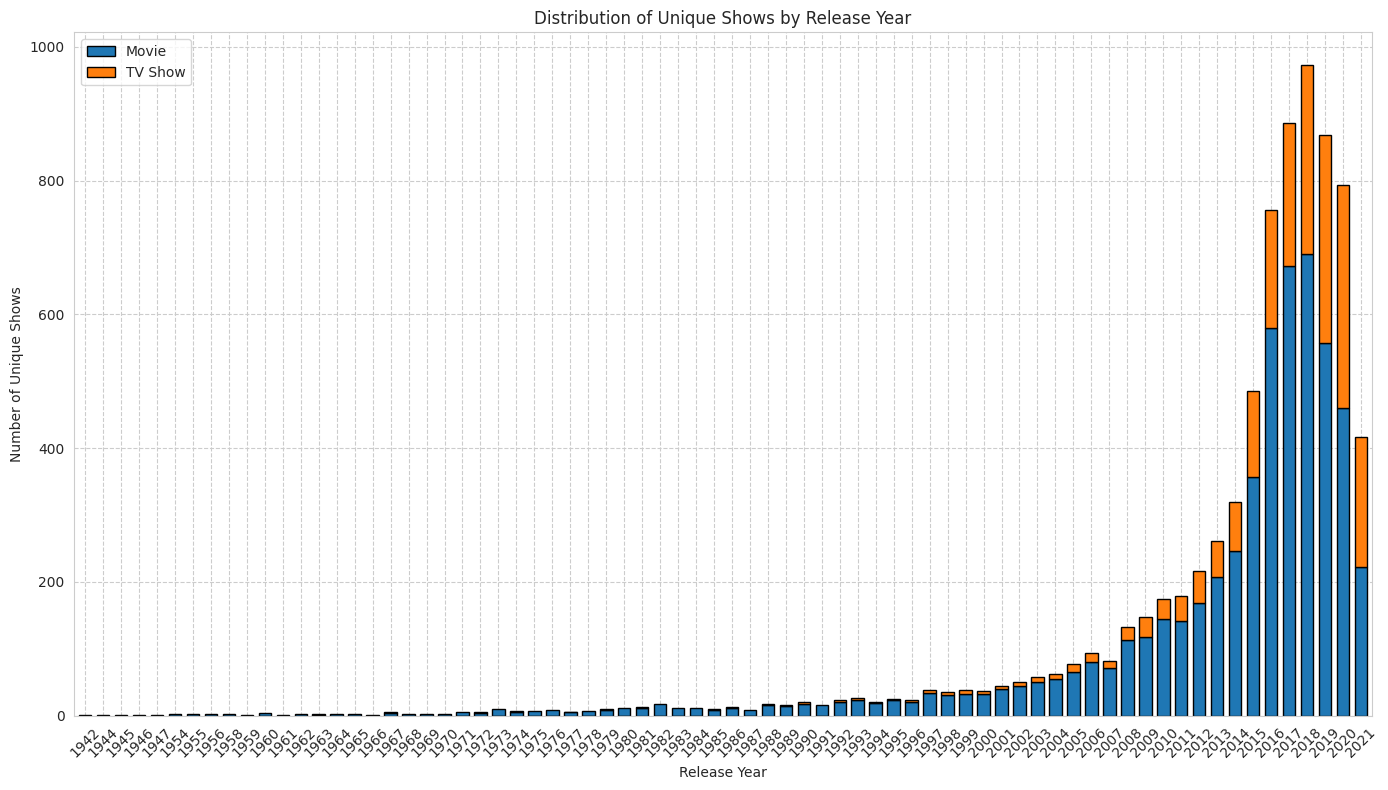

In [ ]:

plt.figure(figsize=(14, 8))

# Plotting the movies and TV shows as stacked bars on the primary y-axis
ax1 = table1[['Movie', 'TV Show']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black', width=0.7, figsize=(14, 8))

# Adding labels and title
plt.title('Distribution of Unique Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Unique Shows')
plt.xticks(rotation=45)

# Adding grid
plt.grid(True, axis='y')

# Adding percentage axis label for the primary y-axis
ax1.set_ylabel('Number of Unique Shows')

# Adding legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
ax1.legend(lines_1, labels_1, loc='upper left')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


the above chart is a stacked bar chart, we can see the expoeneiton growth of both TV shows and Movies, significantly rising post 2005 and atainin its peak in 2019. and the following an significant drop in no.of movies.

The analysis reveals that movies constitute approximately 73.3% of the total unique shows, with 5581 unique movies in the dataset. Conversely, TV shows make up around 26.7%, representing 2036 unique entries. This indicates a notable prevalence of movies over TV shows, suggesting a broader variety in movie offerings compared to TV shows.

In [ ]:
# Define a function to extract movie duration
def extract_movie_duration(duration):
    match = re.search(r'(\d+) min', duration)
    if match:
        return int(match.group(1))
    else:
        return 0

# Apply the function to extract movie duration
data['movie_duration'] = data['duration'].apply(extract_movie_duration)

# Filter only Movie type data
movie_df = data[data['type'] == 'Movie']

# Calculate cumulative sum of movie durations over the years
agg_para = {'movie_duration': 'mean'}
year_movie_duration = movie_df.groupby(['release_year','show_id']).agg(agg_para).reset_index()

# Calculate mean and standard deviation
mean_duration = year_movie_duration['movie_duration'].mean()
std_dev = year_movie_duration['movie_duration'].std()
total_duration = year_movie_duration['movie_duration'].sum()
year_movie_duration['cumulative_percentage'] = year_movie_duration['movie_duration'].cumsum() / total_duration * 100

display(year_movie_duration[:10])
print("\n")
print(f"Mean Duration: {mean_duration:.2f} minutes")
print(f"Standard Deviation: {std_dev:.2f} minutes")
print(f"Total Duration: {total_duration:.2f} minutes")


,release_year,show_id,movie_duration,cumulative_percentage
0,1942,s8206,18.0,0.003168
1,1944,s8641,76.0,0.016545
2,1945,s7220,63.0,0.027633
3,1946,s7295,58.0,0.037842
4,1947,s8588,42.0,0.045234
5,1954,s1700,120.0,0.066356
6,1954,s2376,116.0,0.086773
7,1955,s7840,111.0,0.106310
8,1955,s7955,93.0,0.122679
9,1955,s8507,97.0,0.139752




Mean Duration: 101.80 minutes
Standard Deviation: 27.37 minutes
Total Duration: 568151.00 minutes


<ipython-input-74-2c71b569719c>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




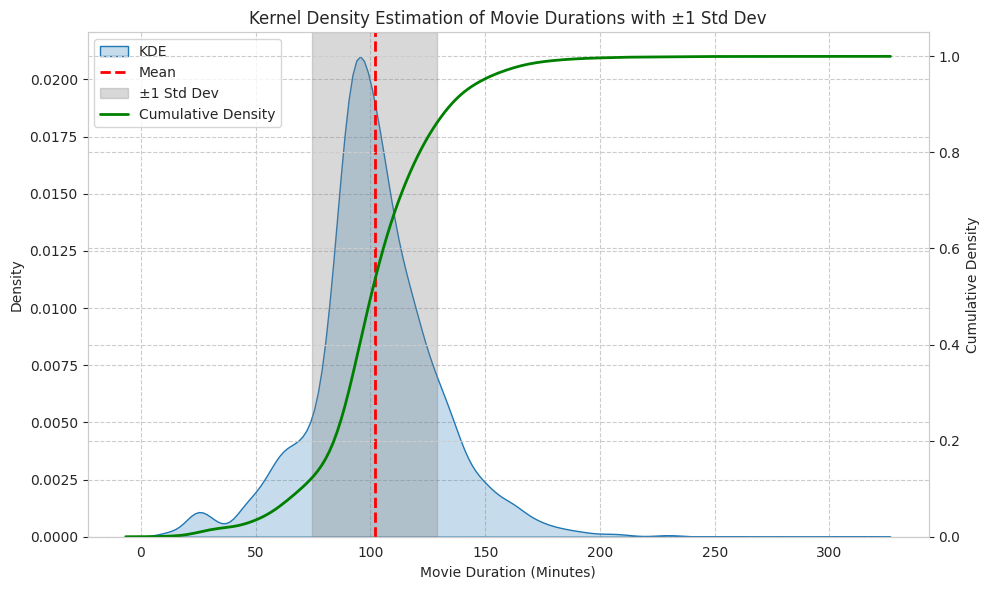

In [ ]:
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# KDE plot with shading for 1 sigma standard deviation on primary y-axis
sns.kdeplot(data=year_movie_duration['movie_duration'], shade=True, ax=ax1, label='KDE')
ax1.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label='Mean')
ax1.axvspan(mean_duration - std_dev, mean_duration + std_dev, color='gray', alpha=0.3, label='±1 Std Dev')
ax1.set_xlabel('Movie Duration (Minutes)')
ax1.set_ylabel('Density')
ax1.set_title('Kernel Density Estimation of Movie Durations with ±1 Std Dev')

# Create the secondary y-axis for the cumulative probability density curve
ax2 = ax1.twinx()
sns.kdeplot(data=year_movie_duration['movie_duration'], cumulative=True, ax=ax2, color='green', linestyle='-', linewidth=2, label='Cumulative Density')
ax2.set_ylabel('Cumulative Density')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


- Movie durations exhibit a Gaussian-like distribution, a common pattern observed in natural phenomena.
- The mean duration of 101.80 minutes represents the central tendency around which most movie lengths cluster.
- A standard deviation of 27.37 minutes quantifies the spread of data points from the mean, indicating the variability in movie durations.
- Higher standard deviation suggests greater variability, implying a wider range of movie lengths.
- Factors contributing to this variability may include narrative complexity, genre conventions, or audience expectations.
- Outliers beyond ±1 standard deviation could indicate unique or experimental films deviating significantly from the norm.
- Exploring these outliers may offer insights into emerging trends or niche audience preferences.

<ipython-input-75-e26a6e8cc7db>:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




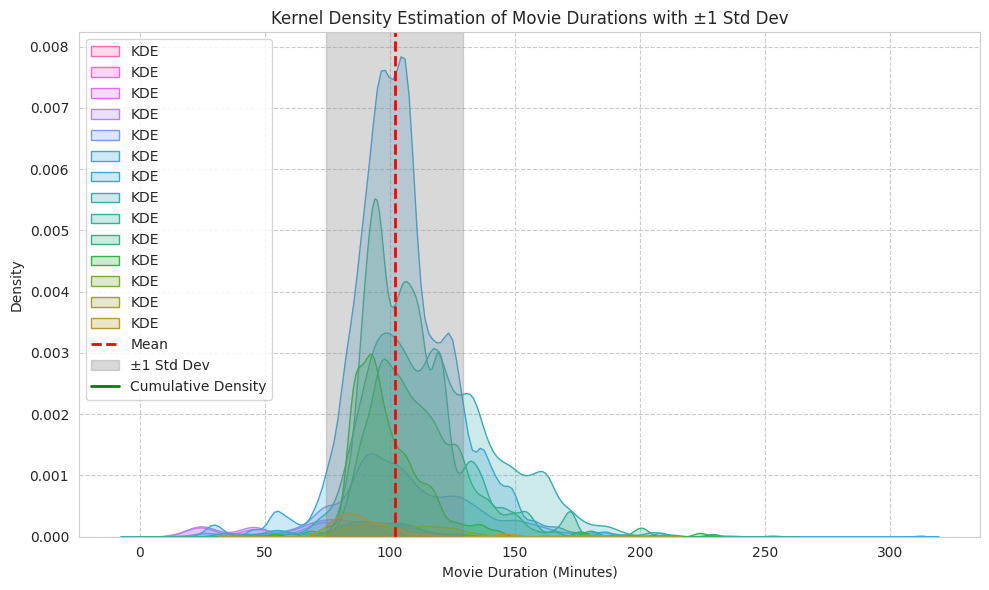

In [ ]:
# Merge year_movie_duration with the original data to include the 'rating' column
merged_data = year_movie_duration.merge(data[['show_id', 'rating']], on='show_id', how='left')

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# KDE plot with shading for 1 sigma standard deviation on primary y-axis, differentiated by rating
sns.kdeplot(data=merged_data, x='movie_duration', hue='rating', shade=True, ax=ax1, label='KDE')

# Add mean and ±1 Std Dev lines
ax1.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label='Mean')
ax1.axvspan(mean_duration - std_dev, mean_duration + std_dev, color='gray', alpha=0.3, label='±1 Std Dev')

# Set labels and title
ax1.set_xlabel('Movie Duration (Minutes)')
ax1.set_ylabel('Density')
ax1.set_title('Kernel Density Estimation of Movie Durations with ±1 Std Dev')

# Create the secondary y-axis for the cumulative probability density curve
# ax2 = ax1.twinx()
# sns.kdeplot(data=merged_data, x='movie_duration', hue='rating', cumulative=True, ax=ax2, color='green', linestyle='-', linewidth=2, label='Cumulative Density')
# ax2.set_ylabel('Cumulative Density')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


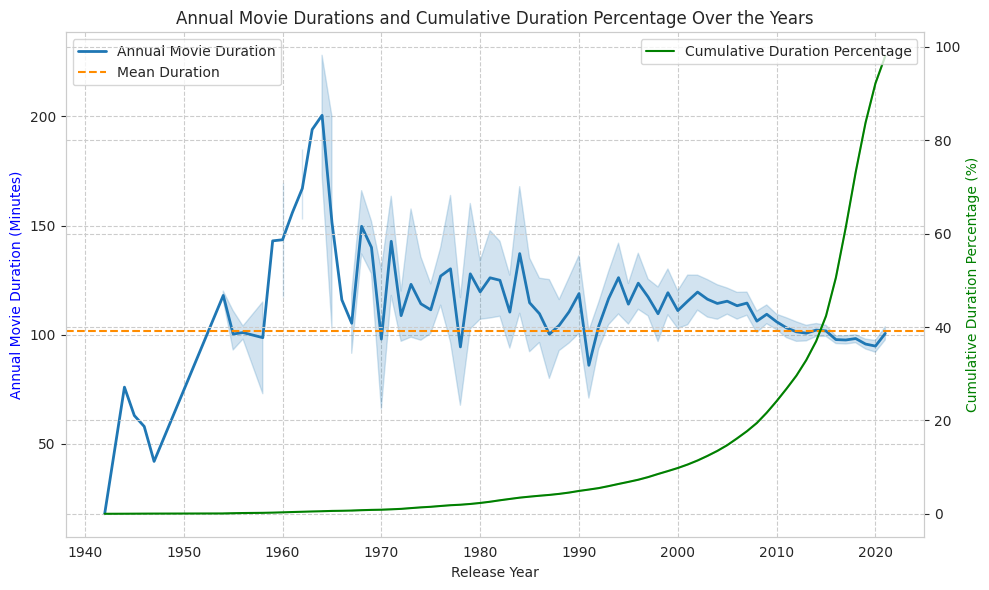

In [ ]:
# The mean value of the movie durations across all years
mean_duration = year_movie_duration['movie_duration'].mean()

# Create the figure and the first subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot movie durations on primary y-axis
sns.lineplot(x='release_year', y='movie_duration', data=year_movie_duration, ax=ax1, label='Annual Movie Duration', linewidth=2) #, color='blue')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Annual Movie Duration (Minutes)', color='blue')

# Create the second y-axis for cumulative percentage
ax2 = ax1.twinx()

# Plot cumulative percentage of movie durations on secondary y-axis
sns.lineplot(x='release_year', y='cumulative_percentage', data=year_movie_duration, ax=ax2, color='green', label='Cumulative Duration Percentage')
ax2.set_ylabel('Cumulative Duration Percentage (%)', color='green')

# Add horizontal line for mean duration on primary y-axis
ax1.axhline(mean_duration, color='darkorange', linestyle='--', label='Mean Duration')

# Set legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title('Annual Movie Durations and Cumulative Duration Percentage Over the Years')
plt.tight_layout()
plt.show()


Across the span of the years, we can observe that the annual movie duration has been converging towards the mean value. This trend suggests a stabilization in movie durations over time, indicating a shift towards standardization in filmmaking practices.

In [ ]:
# Define a function to extract TV show duration
def extract_tv_show_duration(x):
    if x[-7:] == 'Seasons':
        return int(x[:-8])
    elif x[-6:] == 'Season':
        return int(x[:-7])
    else:
        return 0

# Apply the function to extract TV show duration
data['tv_show_duration'] = data['duration'].apply(extract_tv_show_duration)

# Filter only TV Show type data
tv_show_df = data[data['type'] == 'TV Show']

# Calculate cumulative sum of TV show durations over the years
agg_para = {'tv_show_duration': 'mean'}  # Assuming there's a column named 'tv_show_duration' for TV shows
year_tv_show_duration = tv_show_df.groupby(['release_year', 'show_id']).agg(agg_para).reset_index()

# Calculate mean and standard deviation for TV shows
mean_duration_tv = year_tv_show_duration['tv_show_duration'].mean()
std_dev_tv = year_tv_show_duration['tv_show_duration'].std()
total_duration_tv = year_tv_show_duration['tv_show_duration'].sum()
year_tv_show_duration['cumulative_percentage'] = year_tv_show_duration['tv_show_duration'].cumsum() / total_duration_tv * 100

# Display the first 10 rows of the TV show duration data
display(year_tv_show_duration[:10])
print("\n")
# Print mean, standard deviation, and total duration for TV shows
print(f"Mean Duration for TV Shows: {mean_duration_tv:.2f} seasons")  # Assuming 'tv_show_duration' represents seasons for TV shows
print(f"Standard Deviation for TV Shows: {std_dev_tv:.2f} seasons")
print(f"Total Duration for TV Shows: {total_duration_tv:.2f} seasons")

,release_year,show_id,tv_show_duration,cumulative_percentage
0,1963,s8542,4.0,0.103681
1,1967,s8190,8.0,0.311042
2,1972,s4551,1.0,0.336962
3,1974,s4552,4.0,0.440643
4,1977,s6550,10.0,0.699844
5,1979,s6675,1.0,0.725765
6,1981,s7589,1.0,0.751685
7,1985,s7879,1.0,0.777605
8,1986,s2741,6.0,0.933126
9,1986,s7994,1.0,0.959046




Mean Duration for TV Shows: 1.89 seasons
Standard Deviation for TV Shows: 1.69 seasons
Total Duration for TV Shows: 3858.00 seasons


<ipython-input-78-a3d8fb91f8be>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




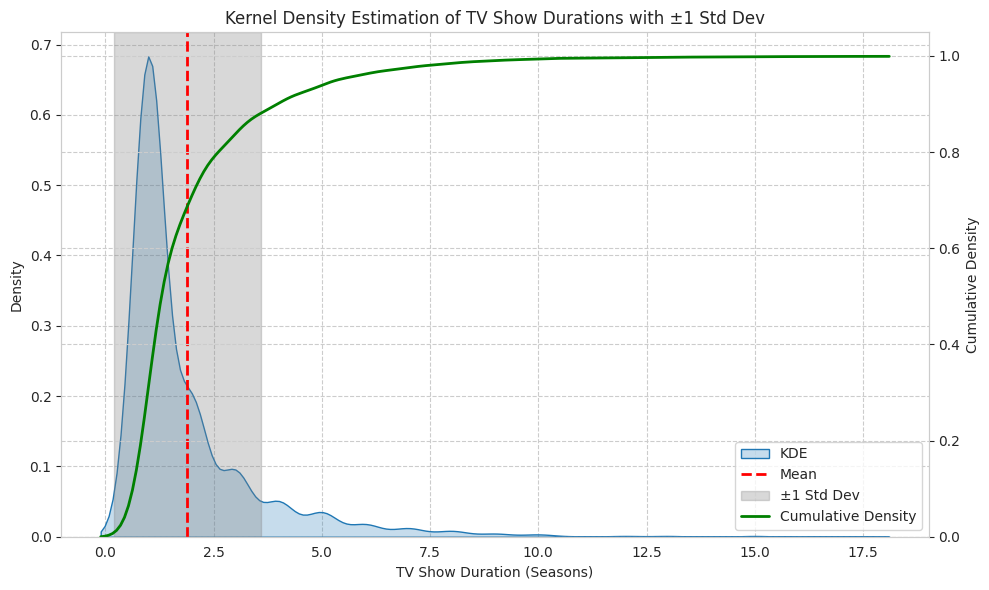

In [ ]:
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# KDE plot with shading for 1 sigma standard deviation on primary y-axis
sns.kdeplot(data=year_tv_show_duration['tv_show_duration'], shade=True, ax=ax1, label='KDE')
ax1.axvline(mean_duration_tv, color='red', linestyle='--', linewidth=2, label='Mean')
ax1.axvspan(mean_duration_tv - std_dev_tv, mean_duration_tv + std_dev_tv, color='gray', alpha=0.3, label='±1 Std Dev')
ax1.set_xlabel('TV Show Duration (Seasons)')
ax1.set_ylabel('Density')
ax1.set_title('Kernel Density Estimation of TV Show Durations with ±1 Std Dev')

# Create the secondary y-axis for the cumulative probability density curve
ax2 = ax1.twinx()
sns.kdeplot(data=year_tv_show_duration['tv_show_duration'], cumulative=True, ax=ax2, color='green', linestyle='-', linewidth=2, label='Cumulative Density')
ax2.set_ylabel('Cumulative Density')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

# Show plot
plt.tight_layout()
plt.show()

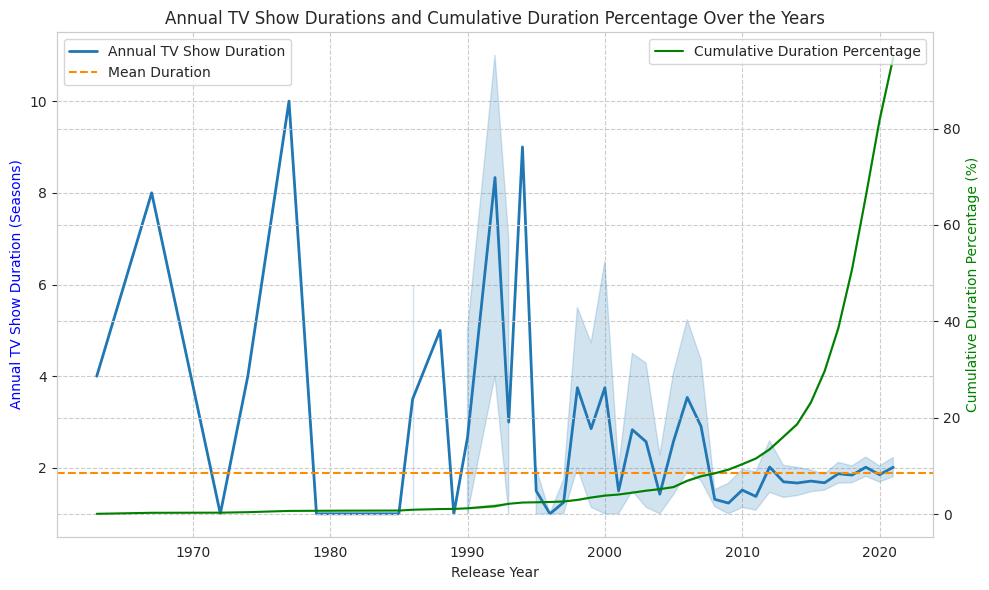

In [ ]:
# Calculate the mean value of the TV show durations across all years
mean_duration_tv = year_tv_show_duration['tv_show_duration'].mean()

# Create the figure and the first subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot TV show durations on primary y-axis
sns.lineplot(x='release_year', y='tv_show_duration', data=year_tv_show_duration, ax=ax1, label='Annual TV Show Duration', linewidth=2) #, color='blue')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Annual TV Show Duration (Seasons)', color='blue')

# Create the second y-axis for cumulative percentage
ax2 = ax1.twinx()

# Plot cumulative percentage of TV show durations on secondary y-axis
sns.lineplot(x='release_year', y='cumulative_percentage', data=year_tv_show_duration, ax=ax2, color='green', label='Cumulative Duration Percentage')
ax2.set_ylabel('Cumulative Duration Percentage (%)', color='green')

# Add horizontal line for mean duration on primary y-axis
ax1.axhline(mean_duration_tv, color='darkorange', linestyle='--', label='Mean Duration')

# Set legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title('Annual TV Show Durations and Cumulative Duration Percentage Over the Years')
plt.tight_layout()
plt.show()


Across the span of the years, we can observe that the annual TV AHow Duration  has been converging towards the mean value. This trend suggests a stabilization in movie durations over time, indicating a shift towards standardization in filmmaking practices.

> **Multivariate Analysis on Movie Ratings Based on Movie Duration on Netflix**

<ipython-input-33-08f182dbffe7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='movie_duration', data=filtered_data, palette="Set2")


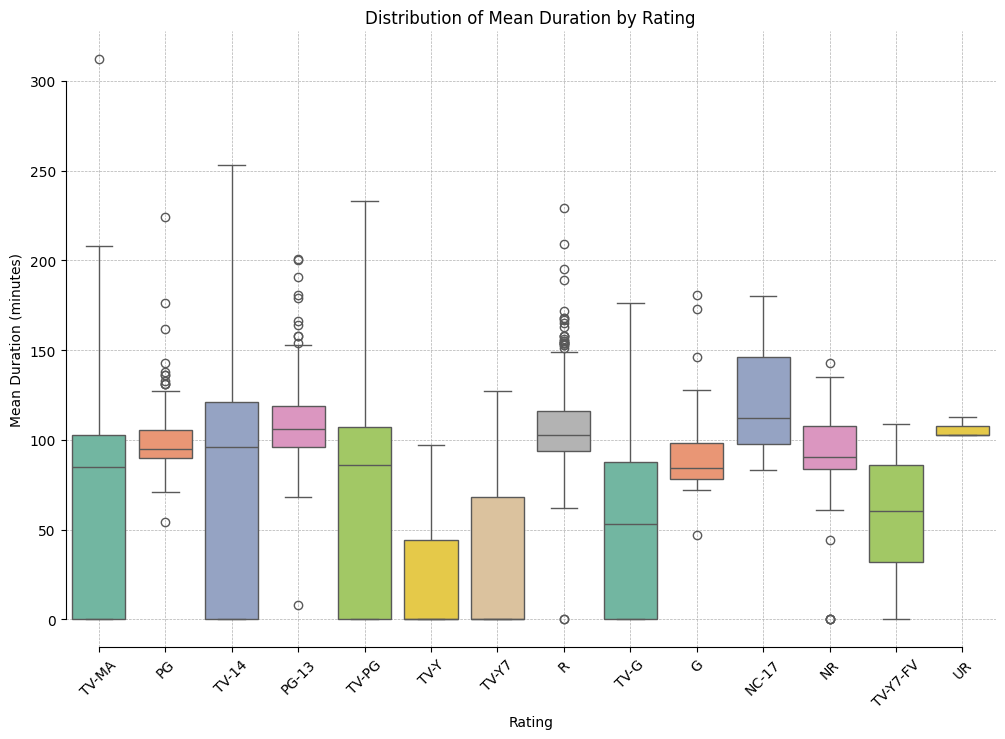

           count        mean        std    min     25%    50%     75%    max
rating                                                                      
G           40.0   92.300000  25.503343   47.0   78.00   84.5   98.00  181.0
NC-17        3.0  125.000000  49.789557   83.0   97.50  112.0  146.00  180.0
NR          62.0   90.145161  30.324392    0.0   84.00   90.5  107.50  143.0
PG         279.0   99.014337  15.993472   54.0   90.00   95.0  105.50  224.0
PG-13      476.0  108.804622  19.073643    8.0   96.00  106.0  119.00  201.0
R          790.0  106.477215  19.153211    0.0   94.00  103.0  116.00  229.0
TV-14     1861.0   78.715744  57.826412    0.0    0.00   96.0  121.00  253.0
TV-G       167.0   48.544910  46.485223    0.0    0.00   53.0   87.50  176.0
TV-MA     2757.0   65.564744  49.586255    0.0    0.00   85.0  103.00  312.0
TV-PG      673.0   67.439822  54.315736    0.0    0.00   86.0  107.00  233.0
TV-Y       233.0   23.055794  29.841700    0.0    0.00    0.0   44.00   97.0

In [ ]:
# Ensure 'rating' column is of type string
data['rating'] = data['rating'].astype(str)

# Step 1: Filter out records with invalid ratings
invalid_ratings = ['66 min', '74 min', '84 min']
filtered_data = data[~data['rating'].isin(invalid_ratings)]

# Step 2: Calculate the mean duration for each show ID
mean_duration = filtered_data.groupby('show_id')['movie_duration'].mean().reset_index()

# Merge the mean duration back with the filtered data to maintain the ratings
filtered_data = filtered_data[['show_id', 'rating']].drop_duplicates().merge(mean_duration, on='show_id')

# Step 3: Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='movie_duration', data=filtered_data, palette="Set2")
plt.title('Distribution of Mean Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(trim=True)
plt.show()

# Step 4: Group data by 'rating' and calculate descriptive statistics for 'duration' in each group
rating_stats = filtered_data.groupby('rating')['movie_duration'].describe()

# Print the descriptive statistics for each rating
print(rating_stats)


### **Inference**

- **Longer Movies**: NC-17 and PG-13 rated movies tend to be longer, averaging over 100 minutes.
- **Shorter Movies**: TV-Y and TV-G rated movies are generally shorter, often less than an hour.
- **Wide Range**: TV-14 and TV-MA movies have a wide range of durations, with significant outliers.
- **Consistent Length**: G, PG, and R rated movies show more consistency in their durations, clustering around 90-110 minutes.

> **Multivariate Analysis on TV Show Ratings Based on Num of Seasons on Netflix**

<ipython-input-34-4d4eec4d52b7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='num_of_seasons', data=filtered_data, palette="Set2")


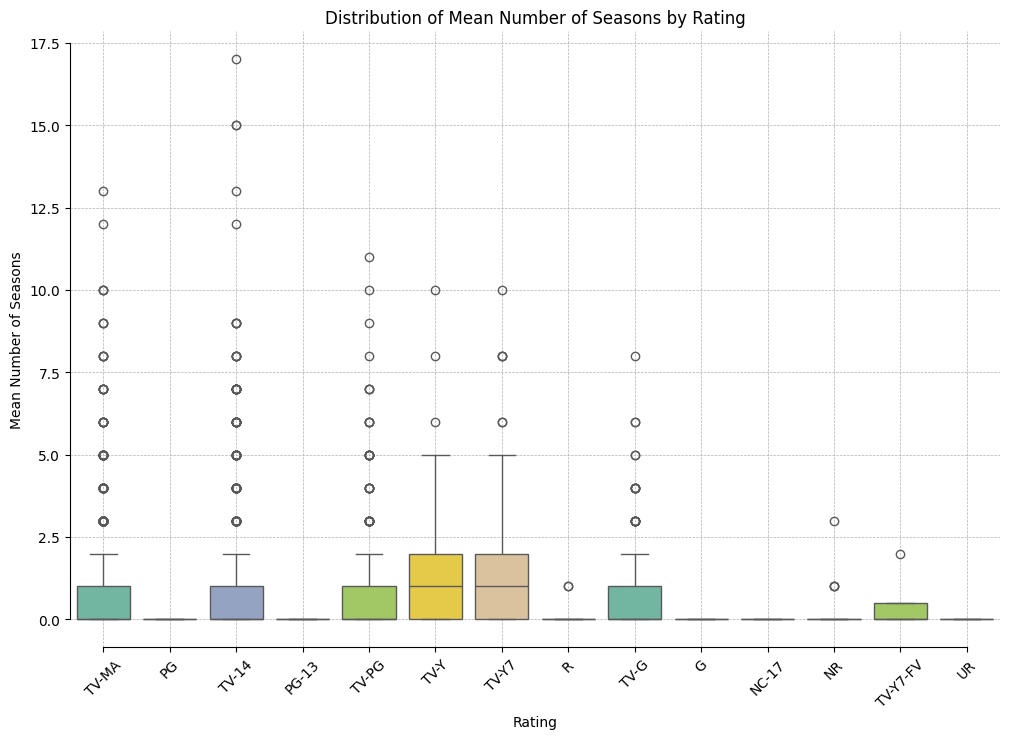

           count      mean       std  min  25%  50%  75%   max
rating                                                        
G           40.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
NC-17        3.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
NR          62.0  0.096774  0.432669  0.0  0.0  0.0  0.0   3.0
PG         279.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
PG-13      476.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
R          790.0  0.002532  0.050284  0.0  0.0  0.0  0.0   1.0
TV-14     1861.0  0.612574  1.466410  0.0  0.0  0.0  1.0  17.0
TV-G       167.0  0.838323  1.402740  0.0  0.0  0.0  1.0   8.0
TV-MA     2757.0  0.578165  1.181375  0.0  0.0  0.0  1.0  13.0
TV-PG      673.0  0.603269  1.291613  0.0  0.0  0.0  1.0  11.0
TV-Y       233.0  1.094421  1.456144  0.0  0.0  1.0  2.0  10.0
TV-Y7      269.0  1.163569  1.610139  0.0  0.0  1.0  2.0  10.0
TV-Y7-FV     4.0  0.500000  1.000000  0.0  0.0  0.0  0.5   2.0
UR           3.0  0.000000  0.000000  0.0  0.0  0.0  0.

In [ ]:
# Ensure 'rating' column is of type string
data['rating'] = data['rating'].astype(str)

# Step 1: Filter out records with invalid ratings
invalid_ratings = ['66 min', '74 min', '84 min']
filtered_data = data[~data['rating'].isin(invalid_ratings)]

# Step 2: Calculate the mean number of seasons for each show ID
mean_seasons = filtered_data.groupby('show_id')['num_of_seasons'].mean().reset_index()

# Merge the mean number of seasons back with the filtered data to maintain the ratings
filtered_data = filtered_data[['show_id', 'rating']].drop_duplicates().merge(mean_seasons, on='show_id')

# Step 3: Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='num_of_seasons', data=filtered_data, palette="Set2")
plt.title('Distribution of Mean Number of Seasons by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Number of Seasons')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(trim=True)
plt.show()

# Step 4: Group data by 'rating' and calculate descriptive statistics for 'num_of_seasons' in each group
rating_stats = filtered_data.groupby('rating')['num_of_seasons'].describe()

# Print the descriptive statistics for each rating
print(rating_stats)


### **Inference**

- **General Observation**: TV shows rated TV-14, TV-G, TV-MA, TV-PG, TV-Y, and TV-Y7 are more likely to have multiple seasons compared to other ratings.
- **Children's Content**: Ratings like TV-Y and TV-Y7 tend to have more seasons on average.
- **Mature Content**: TV-MA shows have a broad range but generally feature multiple seasons.

In [ ]:
aggregated_data.columns

Index(['show_id', 'title', 'director', 'cast', 'listed_in', 'country', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'num_of_seasons',
       'movie_duration', 'description'],
      dtype='object')

> **Multivariate Analysis on Movie Genre Based on Duration on Netflix**

<ipython-input-39-c4aedc99a16d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='listed_in', y='movie_duration', data=filtered_data, palette="Set2")


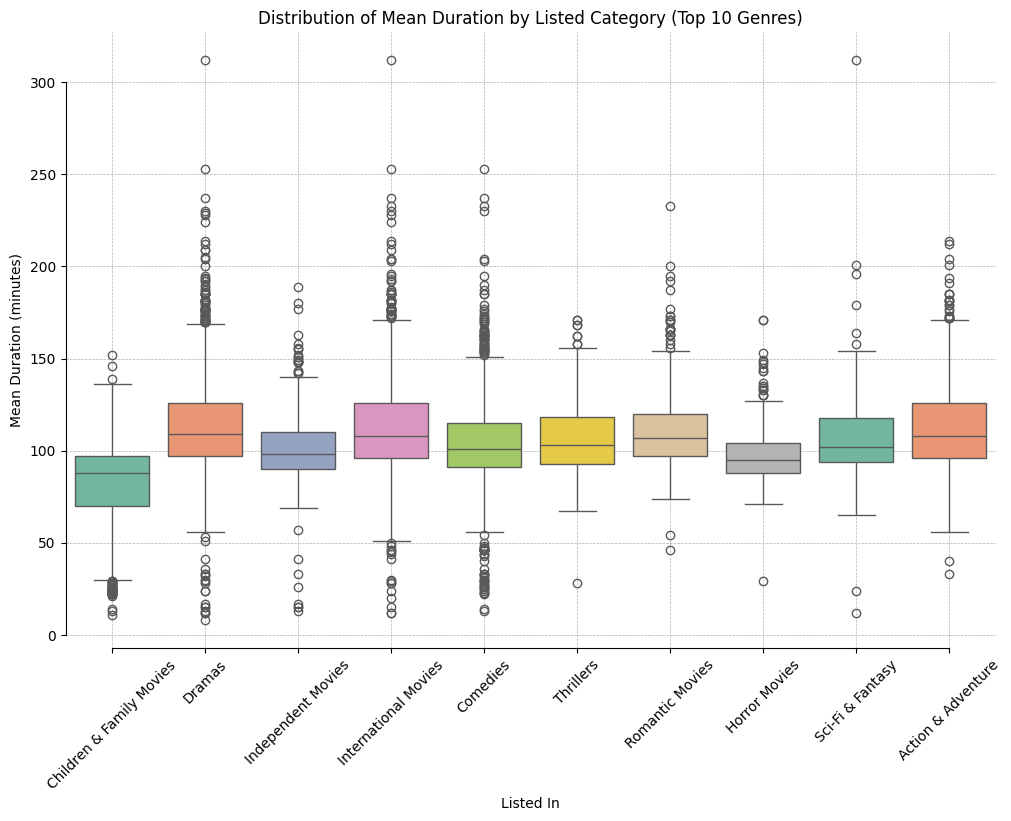

,count,mean,std,min,25%,50%,75%,max
listed_in,,,,,,,,
Action & Adventure,852.0,113.805164,24.693316,33.0,96.0,108.0,126.00,214.0
Children & Family Movies,601.0,81.352745,26.041736,11.0,70.0,88.0,97.00,152.0
Comedies,1653.0,104.201452,24.025888,13.0,91.0,101.0,115.00,253.0
Dramas,2408.0,113.252907,25.118969,8.0,97.0,109.0,126.00,312.0
Horror Movies,354.0,98.533898,15.859519,29.0,88.0,95.0,104.00,171.0
Independent Movies,750.0,101.122667,18.657503,13.0,90.0,98.0,110.00,189.0
International Movies,2554.0,112.599843,25.183471,12.0,96.0,108.0,126.00,312.0
Romantic Movies,608.0,110.643092,21.103087,46.0,97.0,107.0,120.00,233.0
Sci-Fi & Fantasy,240.0,107.062500,25.386721,12.0,94.0,102.0,118.00,312.0


In [ ]:
# Ensure 'listed_in' column is of type string
data['listed_in'] = data['listed_in'].astype(str)

# Step 1: Filter the data to include only 'Movie' type entries
movie_data = data[data['type'] == 'Movie']

# Step 2: Filter out records with invalid ratings in 'listed_in'
invalid_ratings = ['66 min', '74 min', '84 min']
filtered_data = movie_data[~movie_data['listed_in'].isin(invalid_ratings)]

# Step 3: Identify the top 10 'listed_in' categories
top_10_genres = filtered_data['listed_in'].value_counts().nlargest(10).index

# Step 4: Filter the data to include only the top 10 genres
filtered_data = filtered_data[filtered_data['listed_in'].isin(top_10_genres)]

# Step 5: Calculate the mean duration for each show ID
mean_duration = filtered_data.groupby('show_id')['movie_duration'].mean().reset_index()

# Merge the mean duration back with the filtered data to maintain the listed_in information
filtered_data = filtered_data[['show_id', 'listed_in']].drop_duplicates().merge(mean_duration, on='show_id')

# Step 6: Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='listed_in', y='movie_duration', data=filtered_data, palette="Set2")
plt.title('Distribution of Mean Duration by Listed Category (Top 10 Genres)')
plt.xlabel('Listed In')
plt.ylabel('Mean Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(trim=True)
plt.show()

# Step 7: Group data by 'listed_in' and calculate descriptive statistics for 'movie_duration' in each group
listed_stats = filtered_data.groupby('listed_in')['movie_duration'].describe()

# Print the descriptive statistics for each listed_in category
display(listed_stats)


**Inference:**

>**Popular Genres:**
- **Drama**, **International Movies**, and **Comedies** dominate the platform with a large number of titles.

>**Audience Engagement:**
- **Action & Adventure** and **Dramas** engage viewers for longer durations, suggesting high audience interest and potential for immersive experiences.

>**Content Strategy:**
- Shorter-duration genres like **Children & Family Movies** and **Horror Movies** provide options for quick entertainment, catering to diverse viewer preferences.

>**Content Acquisition:**
- Data-driven insights inform content acquisition decisions, focusing on genres with high demand and engagement to expand the platform's content library effectively.

>**User Experience Enhancement:**
- Incorporating genre-based recommendations and personalized content suggestions enhances user experience, driving engagement and loyalty.

> **Multivariate Analysis on TV Show Genre Based on Duration on Netflix**

<ipython-input-40-b8ad3a4ee274>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='listed_in', y='num_of_seasons', data=filtered_data, palette="Set2")


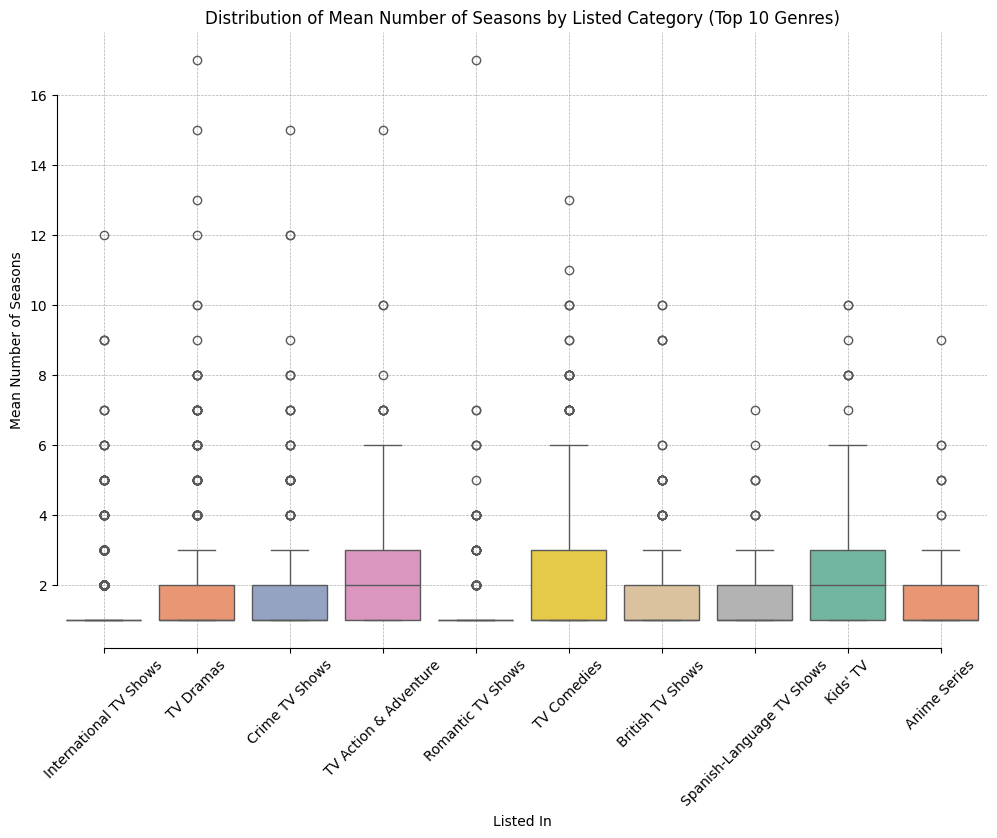

,count,mean,std,min,25%,50%,75%,max
listed_in,,,,,,,,
Anime Series,150.0,1.600000,1.146925,1.0,1.0,1.0,2.0,9.0
British TV Shows,200.0,1.965000,1.681640,1.0,1.0,1.0,2.0,10.0
Crime TV Shows,364.0,1.851648,1.750237,1.0,1.0,1.0,2.0,15.0
International TV Shows,1063.0,1.460960,1.060385,1.0,1.0,1.0,1.0,12.0
Kids' TV,341.0,2.131965,1.553991,1.0,1.0,2.0,3.0,10.0
Romantic TV Shows,301.0,1.405316,1.314726,1.0,1.0,1.0,1.0,17.0
Spanish-Language TV Shows,140.0,1.600000,1.098069,1.0,1.0,1.0,2.0,7.0
TV Action & Adventure,153.0,2.431373,2.132964,1.0,1.0,2.0,3.0,15.0
TV Comedies,485.0,2.239175,1.939293,1.0,1.0,1.0,3.0,13.0


In [ ]:
# Ensure 'listed_in' column is of type string
data['listed_in'] = data['listed_in'].astype(str)

# Step 1: Filter the data to include only 'TV Show' type entries
tv_show_data = data[data['type'] == 'TV Show']

# Step 2: Filter out records with invalid ratings in 'listed_in'
invalid_ratings = ['66 min', '74 min', '84 min']
filtered_data = tv_show_data[~tv_show_data['listed_in'].isin(invalid_ratings)]

# Step 3: Identify the top 10 'listed_in' categories
top_10_genres = filtered_data['listed_in'].value_counts().nlargest(10).index

# Step 4: Filter the data to include only the top 10 genres
filtered_data = filtered_data[filtered_data['listed_in'].isin(top_10_genres)]

# Step 5: Calculate the mean number of seasons for each show ID
mean_seasons = filtered_data.groupby('show_id')['num_of_seasons'].mean().reset_index()

# Merge the mean number of seasons back with the filtered data to maintain the listed_in information
filtered_data = filtered_data[['show_id', 'listed_in']].drop_duplicates().merge(mean_seasons, on='show_id')

# Step 6: Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='listed_in', y='num_of_seasons', data=filtered_data, palette="Set2")
plt.title('Distribution of Mean Number of Seasons by Listed Category (Top 10 Genres)')
plt.xlabel('Listed In')
plt.ylabel('Mean Number of Seasons')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(trim=True)
plt.show()

# Step 7: Group data by 'listed_in' and calculate descriptive statistics for 'num_of_seasons' in each group
listed_stats = filtered_data.groupby('listed_in')['num_of_seasons'].describe()

# Print the descriptive statistics for each listed_in category
display(listed_stats)


**Inference:**

- **International TV Shows** have the lowest mean number of seasons at 1.46, indicating shorter series lengths on average.
   
- **TV Action & Adventure** exhibits the highest mean number of seasons at 2.43, suggesting longer-running shows in this genre.
   
- **Kids' TV** has a relatively high mean of 2.13 seasons, indicating enduring popularity among younger audiences.

**Multivariant ANalysis on Movie Release Year Distribution by Genre**

<ipython-input-43-746a31e78e47>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='listed_in', y='release_year', data=filtered_data, palette="Set2")


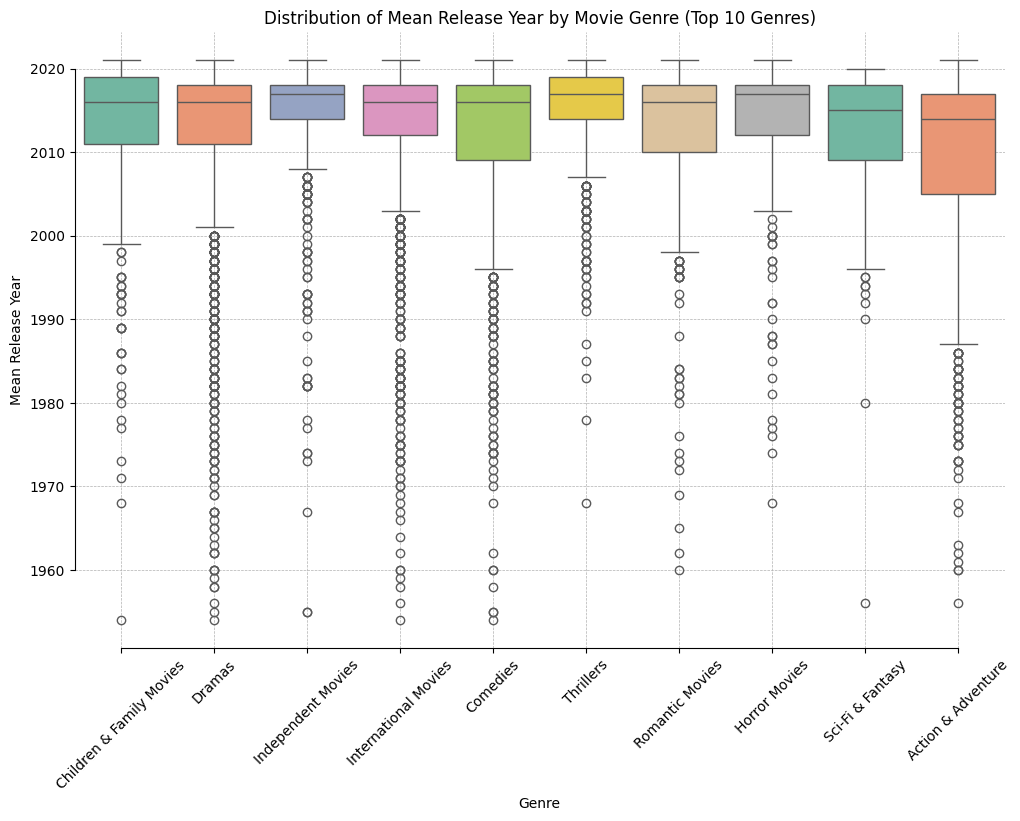

,count,mean,std,min,25%,50%,75%,max
listed_in,,,,,,,,
Action & Adventure,852.0,2009.467136,11.879342,1956.0,2005.0,2014.0,2017.0,2021.0
Children & Family Movies,601.0,2013.594010,8.513415,1954.0,2011.0,2016.0,2019.0,2021.0
Comedies,1653.0,2012.145191,9.454849,1954.0,2009.0,2016.0,2018.0,2021.0
Dramas,2408.0,2012.679402,9.959505,1954.0,2011.0,2016.0,2018.0,2021.0
Horror Movies,354.0,2013.697740,8.335164,1968.0,2012.0,2017.0,2018.0,2021.0
Independent Movies,750.0,2014.357333,7.721300,1955.0,2014.0,2017.0,2018.0,2021.0
International Movies,2554.0,2013.484338,8.852357,1954.0,2012.0,2016.0,2018.0,2021.0
Romantic Movies,608.0,2012.750000,8.863973,1960.0,2010.0,2016.0,2018.0,2021.0
Sci-Fi & Fantasy,240.0,2011.700000,7.927073,1956.0,2009.0,2015.0,2018.0,2020.0


In [ ]:
# Ensure 'listed_in' column is of type string
data['listed_in'] = data['listed_in'].astype(str)

# Step 1: Filter the data to include only 'Movie' type entries
movie_data = data[data['type'] == 'Movie']

# Step 2: Filter out records with invalid ratings in 'listed_in'
invalid_ratings = ['66 min', '74 min', '84 min']
filtered_data = movie_data[~movie_data['listed_in'].isin(invalid_ratings)]

# Step 3: Identify the top 10 'listed_in' categories
top_10_genres = filtered_data['listed_in'].value_counts().nlargest(10).index

# Step 4: Filter the data to include only the top 10 genres
filtered_data = filtered_data[filtered_data['listed_in'].isin(top_10_genres)]

# Step 5: Calculate the mean release year for each show ID
mean_release_year = filtered_data.groupby('show_id')['release_year'].mean().reset_index()

# Merge the mean release year back with the filtered data to maintain the listed_in information
filtered_data = filtered_data[['show_id', 'listed_in']].drop_duplicates().merge(mean_release_year, on='show_id')

# Step 6: Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='listed_in', y='release_year', data=filtered_data, palette="Set2")
plt.title('Distribution of Mean Release Year by Movie Genre (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Mean Release Year')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(trim=True)
plt.show()

# Step 7: Group data by 'listed_in' and calculate descriptive statistics for 'release_year' in each group
listed_stats = filtered_data.groupby('listed_in')['release_year'].describe()

# Print the descriptive statistics for each listed_in category
display(listed_stats)


**Insights:**

- **Consistent Trend:** Movie releases span from as early as 1954 to 2021, with a consistent upward trend in recent years, indicating continuous content production.

- **Popular Genres:** Most movies fall within genres like Comedies, Dramas, and International Movies, released predominantly between 2010 and 2021, reflecting audience preferences.

- **Recent Focus:** Notably, Thrillers and Independent Movies show a concentration of releases in the last decade, suggesting a recent focus on these genres to cater to evolving viewer tastes.

**Multivariant ANalysis on TV Show Release Year Distribution by Genre**

<ipython-input-44-983c15f06e1d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='listed_in', y='release_year', data=filtered_data, palette="Set2")


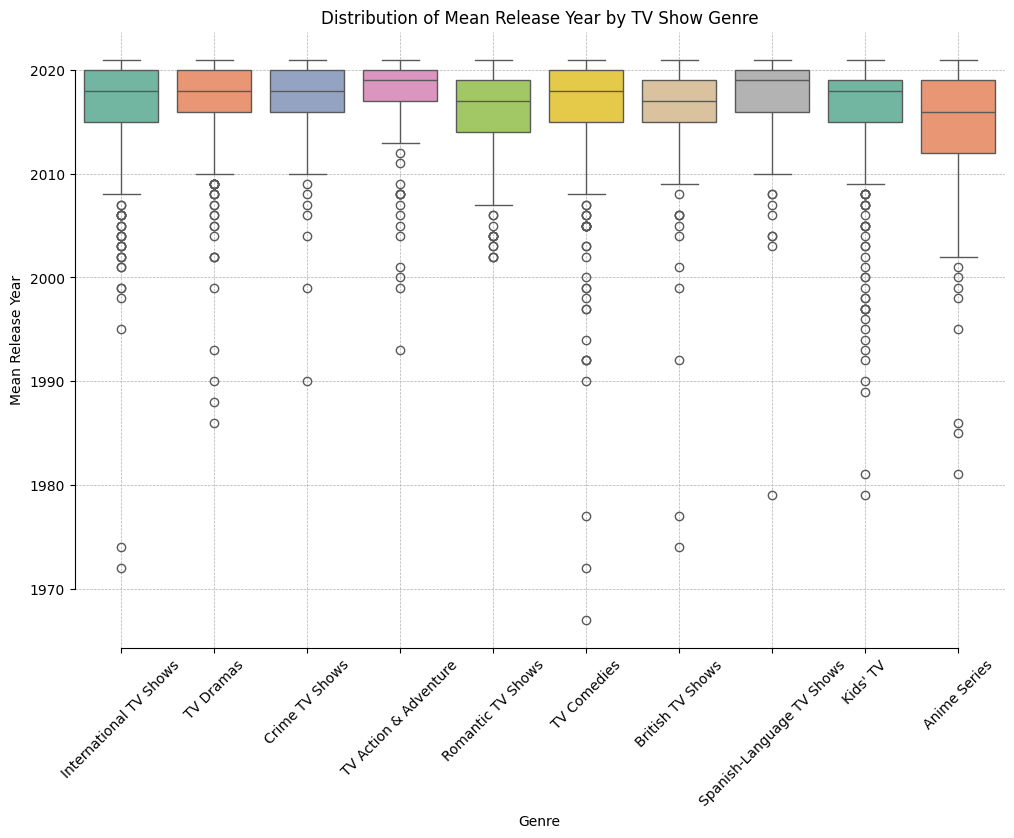

,count,mean,std,min,25%,50%,75%,max
listed_in,,,,,,,,
Anime Series,150.0,2014.366667,6.931512,1981.0,2012.0,2016.0,2019.0,2021.0
British TV Shows,200.0,2015.660000,5.786347,1974.0,2015.0,2017.0,2019.0,2021.0
Crime TV Shows,364.0,2017.494505,3.201665,1990.0,2016.0,2018.0,2020.0,2021.0
International TV Shows,1063.0,2016.809972,4.207385,1972.0,2015.0,2018.0,2020.0,2021.0
Kids' TV,341.0,2015.495601,6.515873,1979.0,2015.0,2018.0,2019.0,2021.0
Romantic TV Shows,301.0,2015.910299,4.141891,2002.0,2014.0,2017.0,2019.0,2021.0
Spanish-Language TV Shows,140.0,2017.200000,4.887512,1979.0,2016.0,2019.0,2020.0,2021.0
TV Action & Adventure,153.0,2017.431373,4.659123,1993.0,2017.0,2019.0,2020.0,2021.0
TV Comedies,485.0,2016.387629,6.038637,1967.0,2015.0,2018.0,2020.0,2021.0


In [ ]:
# Ensure 'listed_in' column is of type string
data['listed_in'] = data['listed_in'].astype(str)

# Step 1: Filter the data to include only 'TV Show' type entries
tv_show_data = data[data['type'] == 'TV Show']

# Step 2: Filter out records with invalid ratings in 'listed_in'
invalid_ratings = ['66 min', '74 min', '84 min']
filtered_data = tv_show_data[~tv_show_data['listed_in'].isin(invalid_ratings)]

# Step 3: Identify the top 10 'listed_in' categories
top_10_genres = filtered_data['listed_in'].value_counts().nlargest(10).index

# Step 4: Filter the data to include only the top 10 genres
filtered_data = filtered_data[filtered_data['listed_in'].isin(top_10_genres)]

# Step 5: Calculate the mean release year for each show ID
mean_release_year = filtered_data.groupby('show_id')['release_year'].mean().reset_index()

# Merge the mean release year back with the filtered data to maintain the listed_in information
filtered_data = filtered_data[['show_id', 'listed_in']].drop_duplicates().merge(mean_release_year, on='show_id')

# Step 6: Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='listed_in', y='release_year', data=filtered_data, palette="Set2")
plt.title('Distribution of Mean Release Year by TV Show Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Release Year')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(trim=True)
plt.show()

# Step 7: Group data by 'listed_in' and calculate descriptive statistics for 'release_year' in each group
listed_stats = filtered_data.groupby('listed_in')['release_year'].describe()

# Print the descriptive statistics for each listed_in category
display(listed_stats)


**Insights:**

- **Diverse Range:** TV show releases vary widely, spanning from 1972 to 2021, showcasing a long history of content production.

- **Recent Trends:** Recent years, particularly from 2015 to 2021, see a surge in TV show releases across genres like Crime, International, and Romantic shows, indicating a focus on diverse content offerings.

- **Consistent Quality:** Despite spanning several decades, the mean release year for most TV show genres lies between 2015 and 2017, suggesting consistent production quality and relevance to audience preferences over time.

> **Exploring the Distribution of Movies and TV Shows Across Ratings**

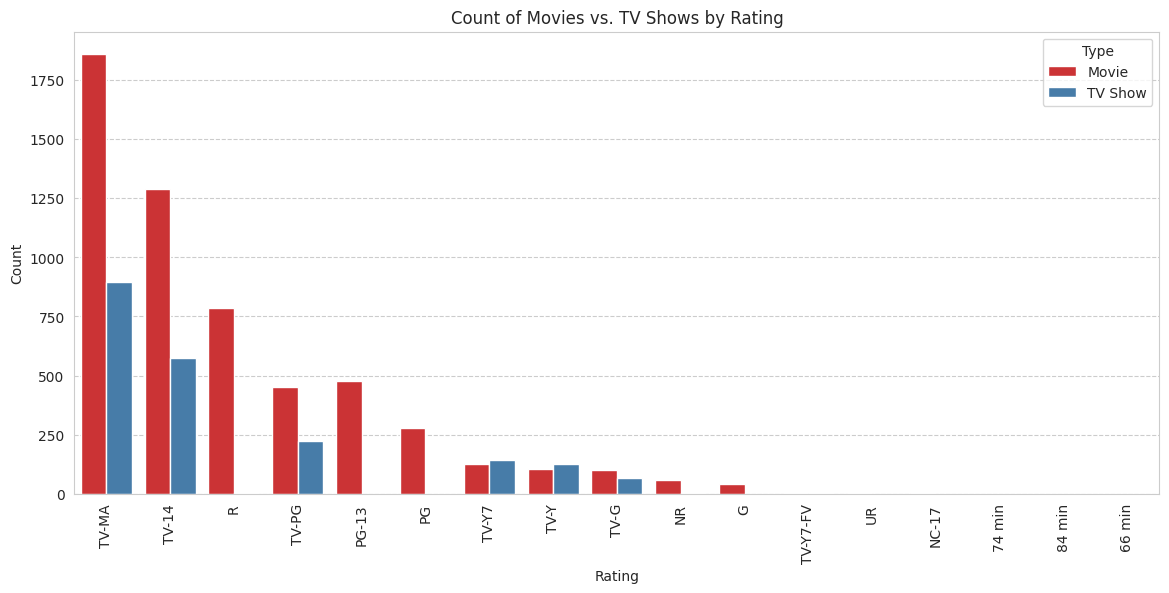

In [ ]:
# Countplot for Type vs Rating
plt.figure(figsize=(14, 6))

sns.countplot(x='rating',
              hue='type',
              data=aggregated_data,
              order=aggregated_data['rating'].value_counts().index,
              palette='Set1'
              )

plt.title('Count of Movies vs. TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()

Based on the descriptive statistics provided for the `release_year` grouped by `rating`, here are ten important insights:

1. **TV-MA Dominance**: The `TV-MA` rating has the highest count of releases with 2757 entries, indicating a significant portion of the dataset consists of mature content aimed at adults.

2. **Recent Content for Younger Audiences**: `TV-Y` rated shows, which are suitable for young children, have a high mean release year of 2017.18, suggesting that content for younger audiences tends to be more recent.

3. **Wide Release Year Range**: The `R` rating shows a wide range of release years from 1962 to 2021, reflecting a long history of releasing restricted content.

4. **Oldest Content**: The oldest release year in the dataset is 1942, under the `TV-14` rating, showing that some content rated for older children and teenagers dates back quite far.

5. **Recent Popularity of TV-MA**: The `TV-MA` category not only has the highest count but also a high mean release year of 2016.50, indicating recent popularity and production of mature content.

6. **Historical Content in TV-G**: The `TV-G` rating has a wide range from 1954 to 2021, indicating that general audience content has been produced consistently over many decades.

7. **NC-17 Specific Range**: The `NC-17` rating, although with a low count of 3, has a tightly clustered release year range from 2013 to 2018, suggesting more recent content production for this restricted category.

8. **Consistency in PG Content**: The `PG` rating shows a consistent production trend with a mean release year of 2008.20 and entries spanning from 1973 to 2021, reflecting sustained family-friendly content production.

9. **Increase in TV-PG Content**: The `TV-PG` rating has a mean release year of 2012.95, indicating that a significant amount of content deemed suitable for a younger audience but with parental guidance has been produced in the last decade.

10. **Outlier for G Rating**: The `G` rating has a standard deviation of 18.33, the highest among all categories, indicating a wide variation in release years, with content ranging from 1956 to 2019. This suggests a broad time span for general audience content.

These insights provide an understanding of content distribution across different ratings and their temporal trends in release years.

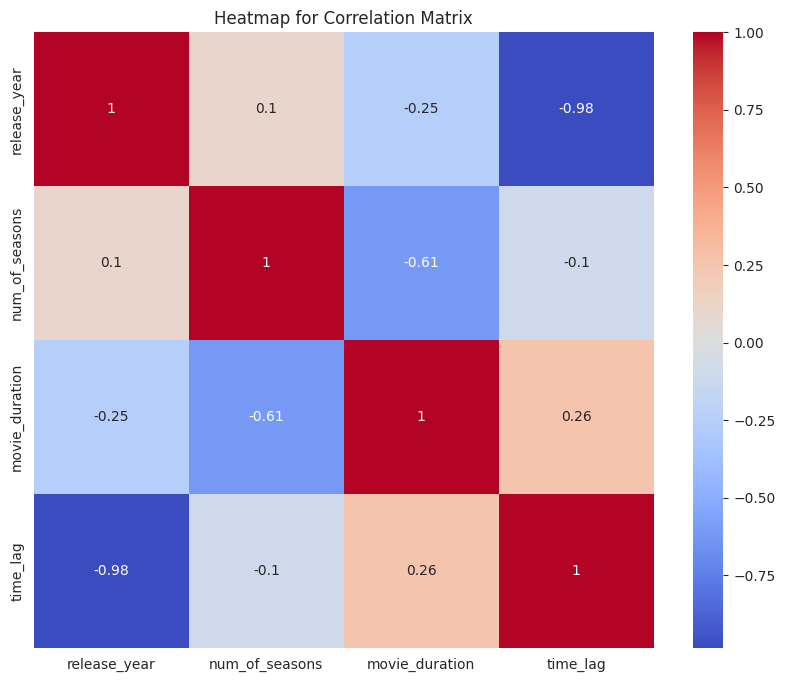

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_cols = aggregated_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = aggregated_data[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation Matrix')
plt.show()


**Inference:**

1. The correlation matrix reveals a strong negative correlation (-0.984) between release year and time lag, indicating newer content is added to Netflix more rapidly.
2. TV show duration tends to decrease (-0.614) as the number of seasons increases, implying shorter episodes in longer-running series.
3. While weak, a positive correlation (0.262) suggests that movies with longer durations experience a slightly longer time lag before appearing on Netflix.

# **7. Business Insights and Recommendations**



### **A. Streamlining Content Acquisition:**

**Insights:**
- Time is crucial in securing rights for newer releases due to shrinking time lags between theatrical release and streaming availability.
- Delays in content acquisition can lead to missed opportunities and competition from other streaming platforms.
  
**Recommendations:**
- Enhance negotiation tactics to swiftly secure rights for newer releases, possibly by offering competitive deals or incentives to content owners.
- Implement streamlined processes for content acquisition, including shorter licensing agreements and prioritizing exclusive rights for high-demand content.



### **B. Strategic Release Timing:**

**Insights:**
- Peak viewing periods and cultural events significantly influence audience engagement and viewership.
- Data analytics can provide insights into optimal release timings for different types of content.
  
**Recommendations:**
- Align content releases with peak viewing periods and cultural events to maximize audience reach and engagement.
- Invest in data analytics tools to forecast audience demand and preferences, enabling strategic planning for release timings.



### **C. Content Duration and Seasons Optimization:**

**Insights:**
- Viewer preferences vary regarding the duration of TV series and the number of seasons.
- Longer-running series offer sustained viewer engagement, but shorter series can cater to changing viewing habits and attention spans.
  
**Recommendations:**
- Introduce longer-running TV series with optimized episode lengths to cater to diverse viewer preferences.
- Experiment with both longer and shorter series lengths to gauge audience response and optimize content offerings accordingly.



### **D. Targeted Content Expansion:**

**Insights:**
- Audience satisfaction and retention can be enhanced by aligning content acquisition strategies with trending genres and content ratings.
- Original content plays a significant role in differentiating Netflix from competitors and building viewer loyalty.
  
**Recommendations:**
- Tailor content acquisition strategies based on trending genres and content ratings to meet evolving viewer preferences.
- Invest in high-quality original TV shows and movies to create a unique content library and strengthen Netflix's brand identity.



### **E. Audience and Genre Preferences:**

**Insights:**
- Netflix's audience spans diverse demographics, necessitating a broad range of content offerings.
- Adult-oriented content is gaining popularity, but investments in teen and children's content are also essential for broadening the platform's appeal.
  
**Recommendations:**
- Expand offerings of adult-oriented content while continuing to invest in teen and children's content to maintain a diverse audience base.
- Diversify the content library to include mainstream genres and specialized content, catering to varied viewer interests and preferences.



### **F. Localization and Cultural Relevance:**

**Insights:**
- Localized content and cultural relevance are critical for attracting and retaining international audiences.
- Data-driven insights can inform localization efforts and content production strategies.
  
**Recommendations:**
- Prioritize localization efforts by providing subtitles, dubbing, and culturally relevant content tailored to specific regions.
- Invest in regional content production and partnerships to enhance Netflix's presence in local markets and strengthen cultural relevance.



### **G. Data-Driven Decision Making:**

**Insights:**
- Data analytics tools provide valuable insights into viewer behavior, preferences, and content performance.
- Data-driven decision making can optimize content offerings, improve viewer satisfaction, and drive engagement.
  
**Recommendations:**
- Leverage data analytics tools to inform content acquisition, production, and marketing strategies.
- Utilize data-driven insights to continuously refine content offerings, enhance viewer experiences, and maximize engagement metrics.



### **H. Strategic Collaborations:**

**Insights:**
- Collaborations with local production companies and talent can facilitate the creation of original content tailored to specific markets.
- Top actors and directors can attract audiences and drive viewership through exclusive deals and original productions.
  
**Recommendations:**
- Forge strategic collaborations with local production companies, filmmakers, and talent to co-produce original content for targeted markets.
- Leverage the popularity of top actors and directors to enhance the appeal of Netflix's original productions and attract a wider audience base.

By implementing these recommendations, Netflix can optimize its content strategy, strengthen viewer engagement, and solidify its position in the global streaming market.